# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2



Group Number: 21

Group Members:
- Muhammad Daffa Kusuma Atmaja 18222108
- Ahmad Fawwazi 18222117

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import other libraries if needed
from ucimlrepo import fetch_ucirepo

# Atur tampilan Pandas
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 20)     
pd.set_option('display.width', 1000)      




## Import Dataset

In [ ]:
file_path = 'train.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

# Load Dataset
# Fetch dataset using ucimlrepo
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# Split data into features (X) and targets (y)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# # Display metadata and variable information
print(phiusiil_phishing_url_website.metadata)
print(phiusiil_phishing_url_website.variables)



   id     FILENAME                                   URL  URLLength                        Domain  DomainLength  IsDomainIP  TLD  CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  HasObfuscation  NoOfObfuscatedChar  ObfuscationRatio  NoOfLettersInURL  LetterRatioInURL  NoOfDegitsInURL  DegitRatioInURL  NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  IsHTTPS  LineOfCode  LargestLineLength  HasTitle                Title  DomainTitleMatchScore  URLTitleMatchScore  HasFavicon  Robots  IsResponsive  NoOfURLRedirect  NoOfSelfRedirect  HasDescription  NoOfPopup  NoOfiFrame  HasExternalFormSubmit  HasSocialNet  HasSubmitButton  HasHiddenFields  HasPasswordField  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  label
0   1          NaN             https://www.northcm.ac.th       24.0             www.northcm.ac.th          17.0         0.0  NaN        

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

In [ ]:
# 1. The size of the data (instances and features).
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")


The dataset has 140404 rows and 56 columns.


In [ ]:
# 2. The data types of each features:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)       
pd.set_option('display.max_rows', None)     

print("Data Types:")
print(df.dtypes)


Data Types:
id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    float64
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                float64
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       float64


In [ ]:
# 3. The number of unique values for categorical features.
categorical_cols = df.select_dtypes(include=['object']).columns

print("Number of unique values for categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


Number of unique values for categorical features:
FILENAME: 82872
URL: 96914
Domain: 69832
TLD: 497
Title: 79460


In [ ]:
# 4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
numerical_cols = df.select_dtypes(include=['number']).columns

print(" The minimum, maximum, mean, median, and standard deviation values for non-categorical features:")

for col in numerical_cols:
    min_value = df[col].min()
    max_value = df[col].max()
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev_value = df[col].std()
    
    print(f"{col}:")
    print(f"  Min: {min_value}")
    print(f"  Max: {max_value}")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {std_dev_value}\n")


 The minimum, maximum, mean, median, and standard deviation values for non-categorical features:
id:
  Min: 1
  Max: 235795
  Mean: 117682.63274550582
  Median: 117421.5
  Standard Deviation: 68122.00507977649

URLLength:
  Min: 14.0
  Max: 4054.0
  Mean: 27.70147307716417
  Median: 26.0
  Standard Deviation: 23.140675584728395

DomainLength:
  Min: 4.0
  Max: 93.0
  Mean: 19.619386724770155
  Median: 19.0
  Standard Deviation: 5.8338077783503515

IsDomainIP:
  Min: 0.0
  Max: 1.0
  Mean: 0.0004884303071005556
  Median: 0.0
  Standard Deviation: 0.022095173922045474

CharContinuationRate:
  Min: 0.0
  Max: 1.0
  Mean: 0.9180073037300187
  Median: 1.0
  Standard Deviation: 0.1591416069048732

TLDLegitimateProb:
  Min: 0.0
  Max: 0.5229071
  Mean: 0.2774819651860483
  Median: 0.5229071
  Standard Deviation: 0.24811547461974554

URLCharProb:
  Min: 0.001229244
  Max: 0.088765828
  Mean: 0.05928594172147442
  Median: 0.060263989
  Standard Deviation: 0.008062862038390652

TLDLength:
  Min:

In [ ]:
#5. Explain the significance of gathering the first four pieces of information.
#Gathering the first four pieces of information in Exploratory Data Analysis (EDA) is crucial for understanding the dataset's characteristics.
    #1. knowing the size of data set : membantu menilai kompleksitas dataset untuk menentukan pemilihan metode analisis datanya.
    #2. knowing the data types of each feature :membantu menentukan teknik analisis yang tepat, karena data numerik dan categorical memerlukan pendekatan yang beda.
    #3. knowing the number of unique values for categorical features : membantu memahami keragaman data dan pengaruhnya terhadap analisis.
    #4. knowing The minimum, maximum, mean, median, and standard deviation values for non-categorical features : Memberikan wawasan tentang distribusi data, apakah ada outlier, dan membantu memutuskan apakah perlu transformasi data.

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [ ]:
#1 Missing Values dor Each Features
missing_values = df.isnull().sum()
print(missing_values)


id                                0
FILENAME                      57532
URL                           43487
URLLength                     60639
Domain                        70197
DomainLength                  46319
IsDomainIP                    42130
TLD                           45399
CharContinuationRate          48042
TLDLegitimateProb             52873
URLCharProb                   52071
TLDLength                     47731
NoOfSubDomain                 44060
HasObfuscation                65720
NoOfObfuscatedChar            66798
ObfuscationRatio              64598
NoOfLettersInURL              63338
LetterRatioInURL              65746
NoOfDegitsInURL               58810
DegitRatioInURL               53508
NoOfEqualsInURL               61578
NoOfQMarkInURL                44101
NoOfAmpersandInURL            45387
NoOfOtherSpecialCharsInURL    47629
SpacialCharRatioInURL         62834
IsHTTPS                       49362
LineOfCode                    69153
LargestLineLength           

Feature: id
Q1 (25th percentile): 58689.5
Q3 (75th percentile): 176724.25
IQR: 118034.75
Lower Bound: -118362.625
Upper Bound: 353776.375
---tidak ada outlier yg terdeteksi---



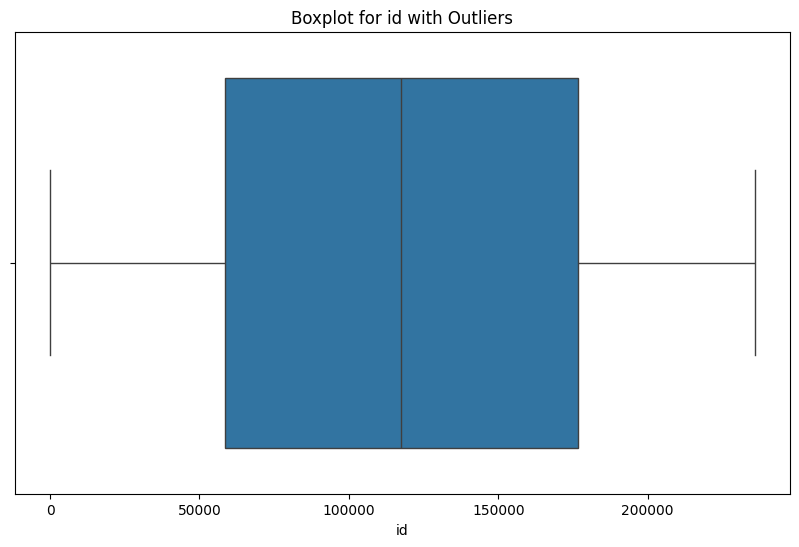

Feature: URLLength
Q1 (25th percentile): 23.0
Q3 (75th percentile): 30.0
IQR: 7.0
Lower Bound: 12.5
Upper Bound: 40.5
Outlier terdeteksi:
35     41.0
196    89.0
253    42.0
311    48.0
315    75.0
Name: URLLength, dtype: float64



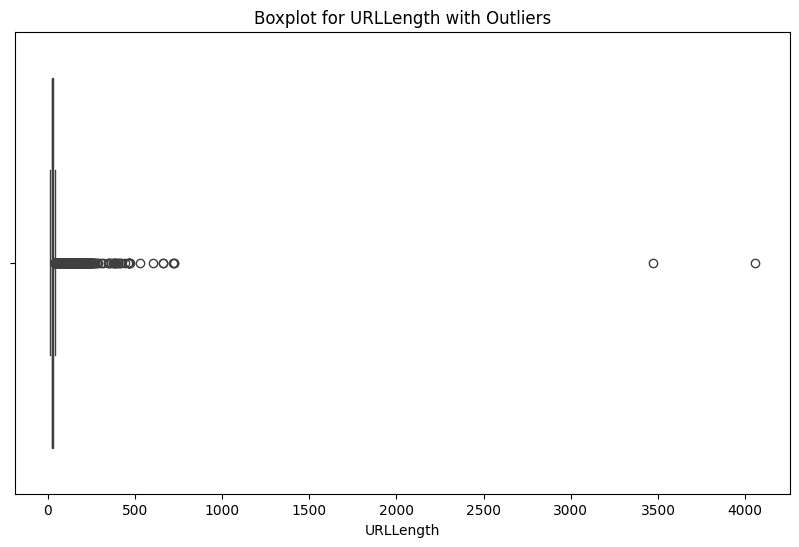

Feature: DomainLength
Q1 (25th percentile): 16.0
Q3 (75th percentile): 23.0
IQR: 7.0
Lower Bound: 5.5
Upper Bound: 33.5
Outlier terdeteksi:
114    38.0
253    34.0
311    39.0
484     4.0
549    36.0
Name: DomainLength, dtype: float64



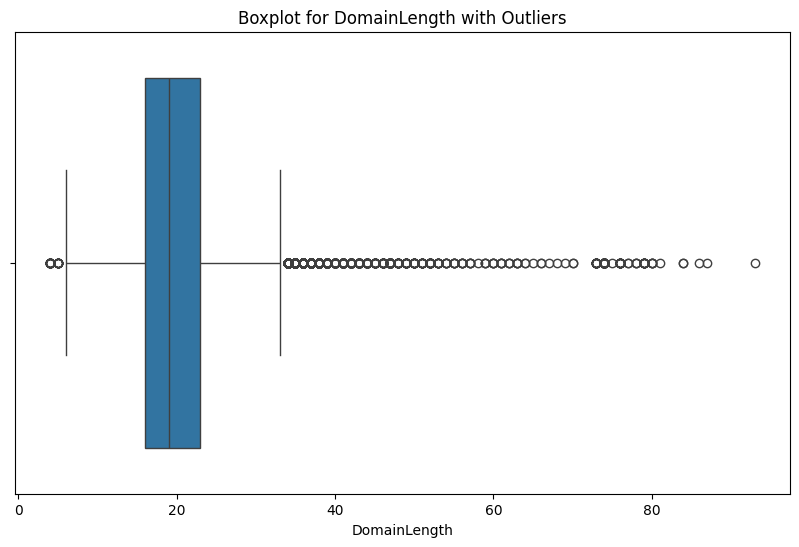

Feature: IsDomainIP
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
4138     1.0
13609    1.0
13723    1.0
23489    1.0
26370    1.0
Name: IsDomainIP, dtype: float64



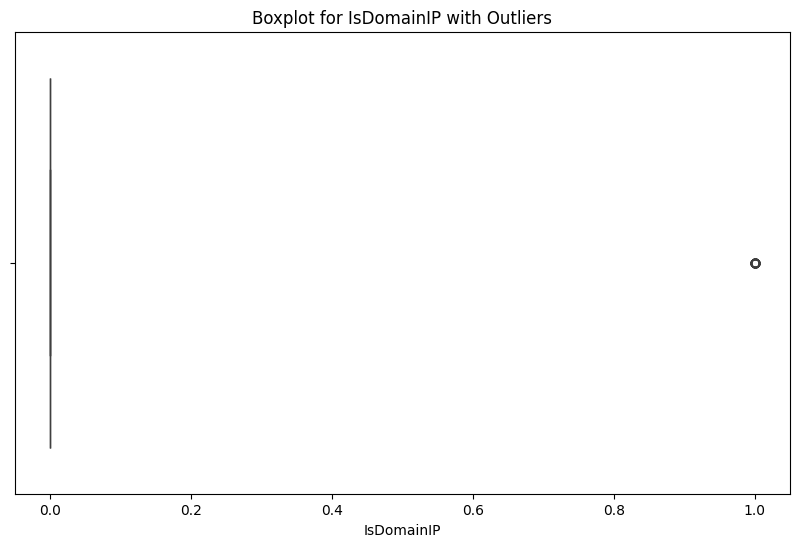

Feature: CharContinuationRate
Q1 (25th percentile): 0.913043478
Q3 (75th percentile): 1.0
IQR: 0.08695652200000004
Lower Bound: 0.782608695
Upper Bound: 1.130434783
Outlier terdeteksi:
3     0.562500
5     0.636364
20    0.666667
28    0.687500
34    0.772727
Name: CharContinuationRate, dtype: float64



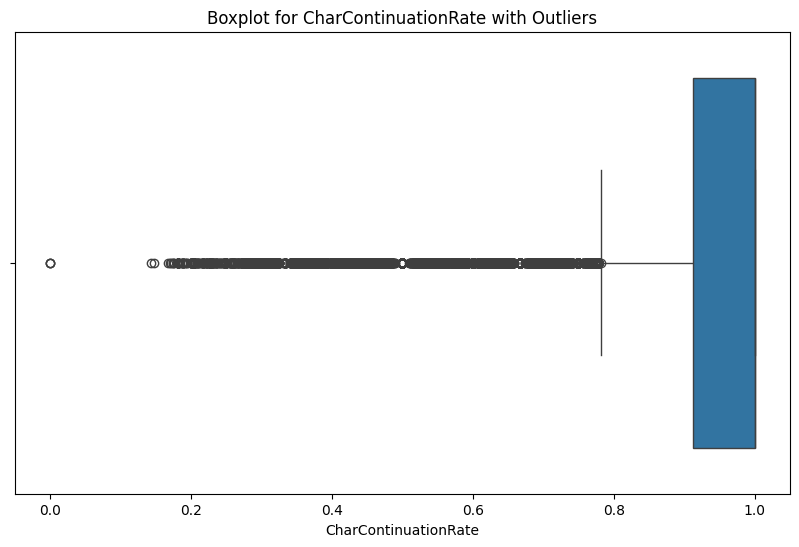

Feature: TLDLegitimateProb
Q1 (25th percentile): 0.0129268
Q3 (75th percentile): 0.5229071
IQR: 0.5099802999999999
Lower Bound: -0.7520436499999998
Upper Bound: 1.2878775499999997
---tidak ada outlier yg terdeteksi---



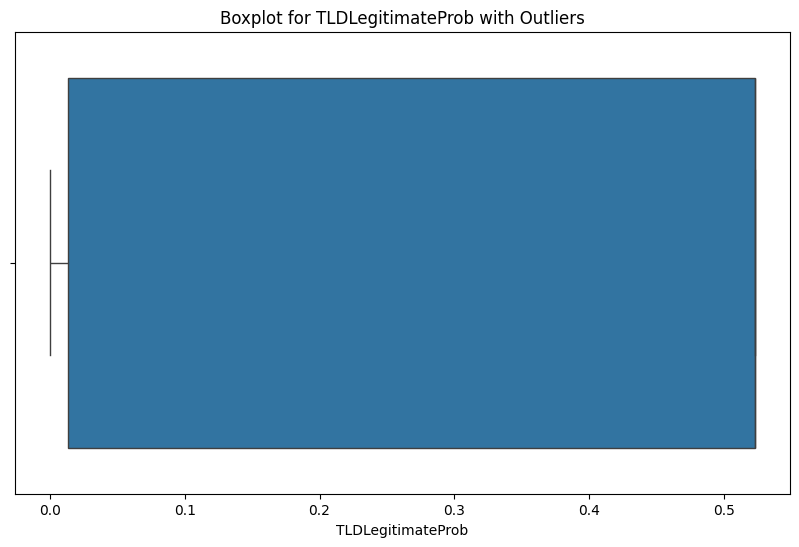

Feature: URLCharProb
Q1 (25th percentile): 0.055541743
Q3 (75th percentile): 0.064390546
IQR: 0.00884880300000001
Lower Bound: 0.04226853849999998
Upper Bound: 0.07766375050000002
Outlier terdeteksi:
1      0.036850
8      0.038131
108    0.038517
111    0.078157
180    0.033701
Name: URLCharProb, dtype: float64



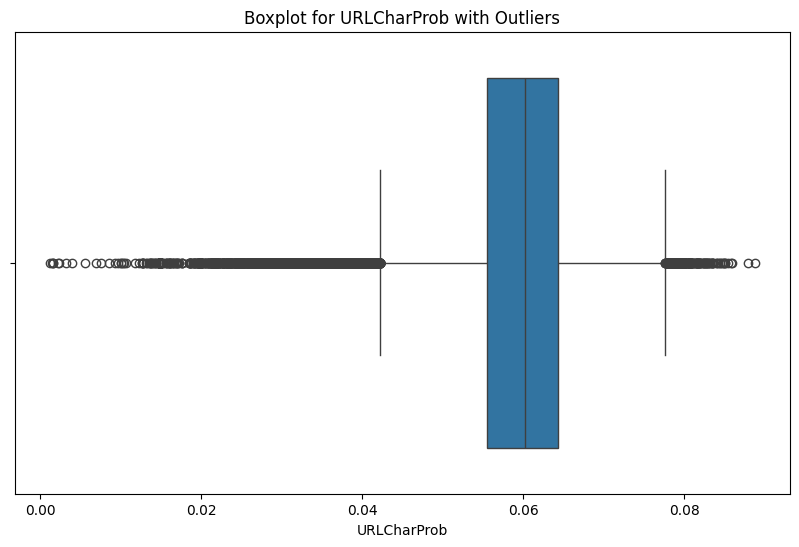

Feature: TLDLength
Q1 (25th percentile): 2.0
Q3 (75th percentile): 3.0
IQR: 1.0
Lower Bound: 0.5
Upper Bound: 4.5
Outlier terdeteksi:
62      7.0
391     7.0
1264    5.0
1804    7.0
2136    6.0
Name: TLDLength, dtype: float64



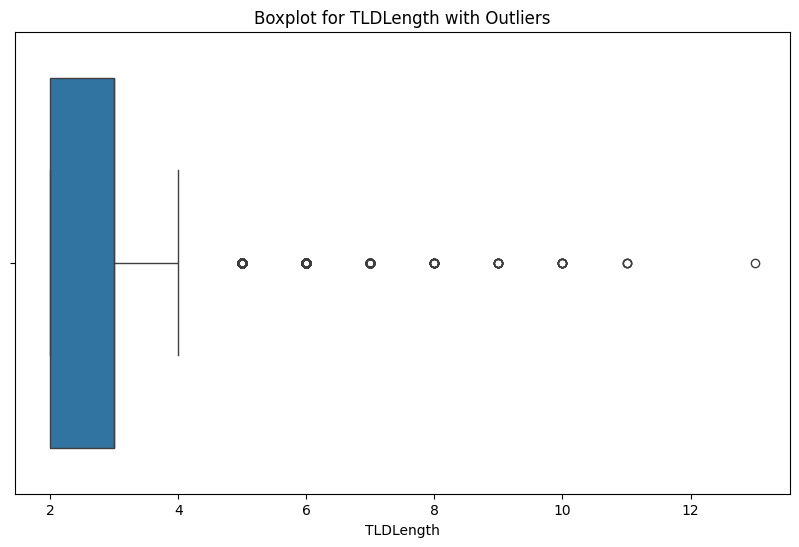

Feature: NoOfSubDomain
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
0     2.0
1     0.0
2     2.0
20    2.0
26    2.0
Name: NoOfSubDomain, dtype: float64



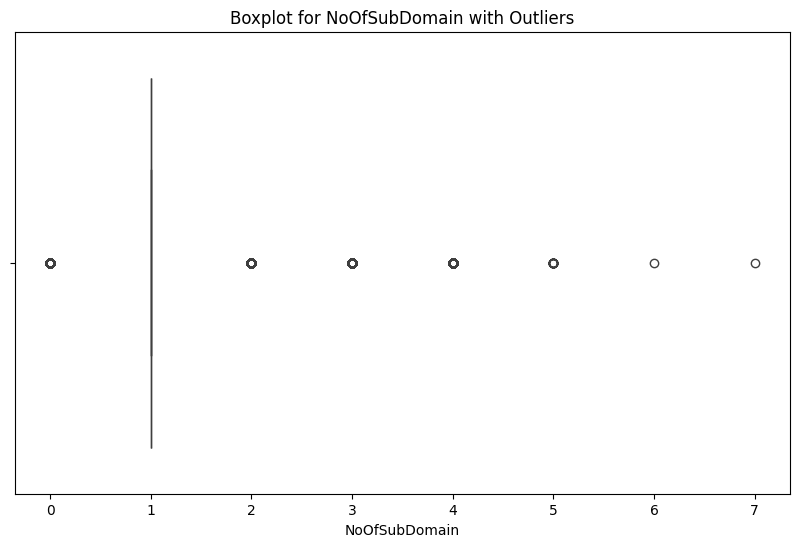

Feature: HasObfuscation
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
6925     1.0
8888     1.0
12301    1.0
15532    1.0
22667    1.0
Name: HasObfuscation, dtype: float64



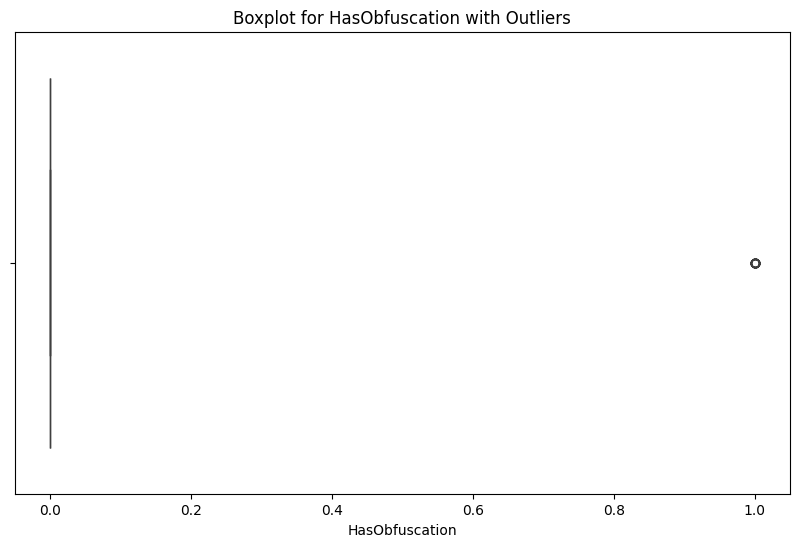

Feature: NoOfObfuscatedChar
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2223     3.0
5529     3.0
5860     3.0
9974     3.0
12301    9.0
Name: NoOfObfuscatedChar, dtype: float64



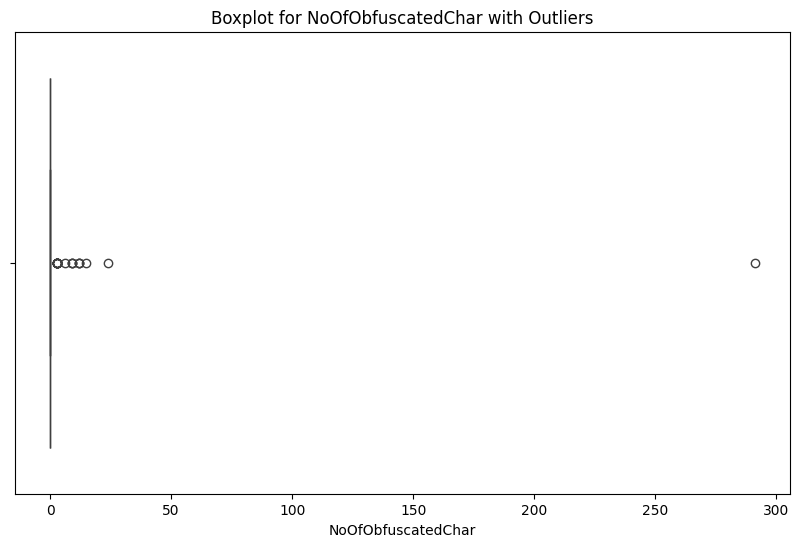

Feature: ObfuscationRatio
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2223     0.059
5529     0.045
5860     0.037
12301    0.080
15532    0.212
Name: ObfuscationRatio, dtype: float64



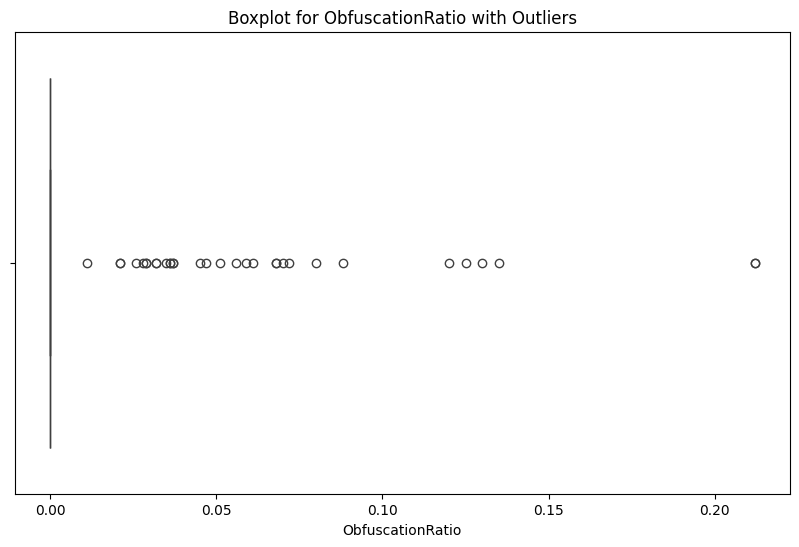

Feature: NoOfLettersInURL
Q1 (25th percentile): 10.0
Q3 (75th percentile): 16.0
IQR: 6.0
Lower Bound: 1.0
Upper Bound: 25.0
Outlier terdeteksi:
11      26.0
34      29.0
114     35.0
196     70.0
333    125.0
Name: NoOfLettersInURL, dtype: float64



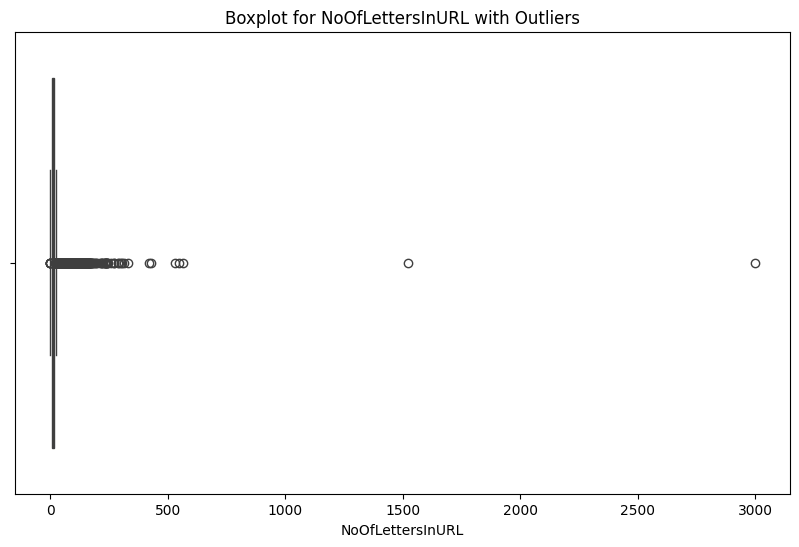

Feature: LetterRatioInURL
Q1 (25th percentile): 0.409
Q3 (75th percentile): 0.552
IQR: 0.14300000000000007
Lower Bound: 0.19449999999999987
Upper Bound: 0.7665000000000002
Outlier terdeteksi:
47      0.158
760     0.150
869     0.800
1560    0.188
1597    0.167
Name: LetterRatioInURL, dtype: float64



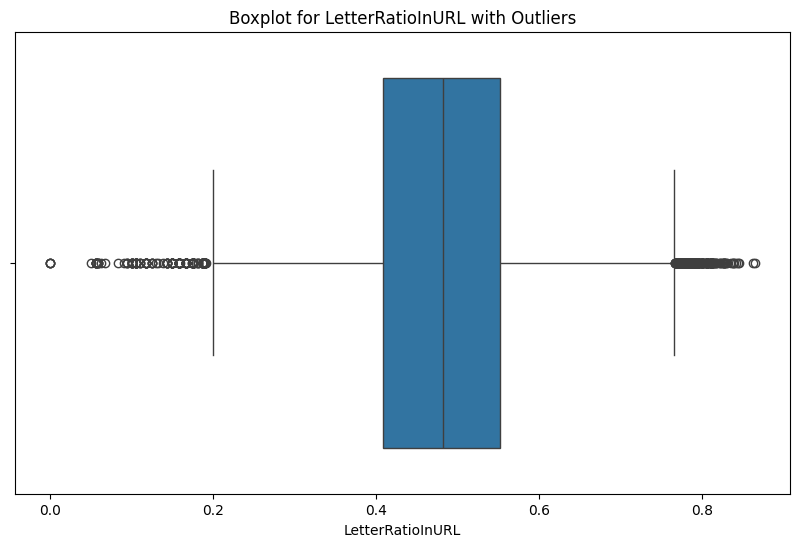

Feature: NoOfDegitsInURL
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
1       2.0
8       3.0
28     16.0
34      1.0
105     4.0
Name: NoOfDegitsInURL, dtype: float64



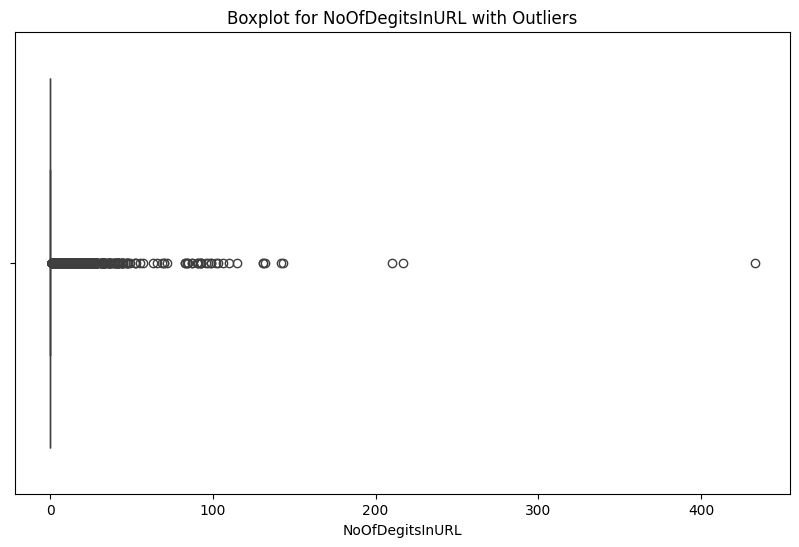

Feature: DegitRatioInURL
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
1     0.105
8     0.150
28    0.168
34    0.024
47    0.158
Name: DegitRatioInURL, dtype: float64



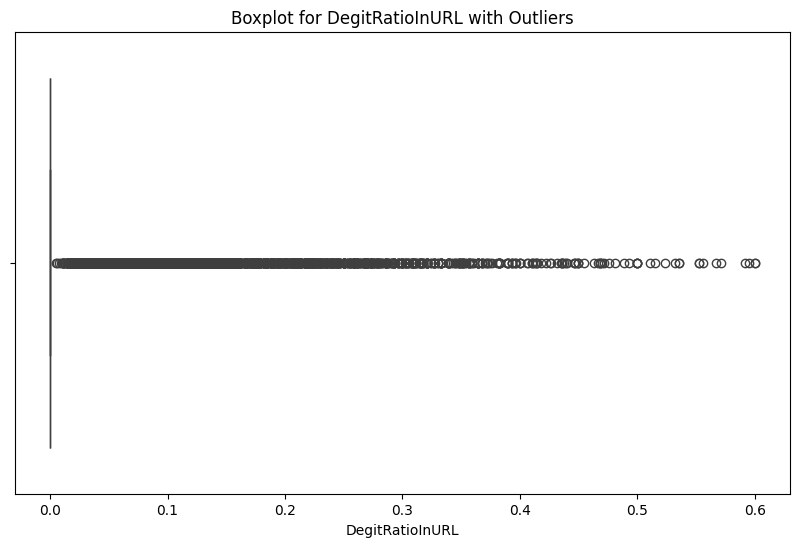

Feature: NoOfEqualsInURL
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
333     3.0
2133    1.0
3992    1.0
4160    1.0
4206    4.0
Name: NoOfEqualsInURL, dtype: float64



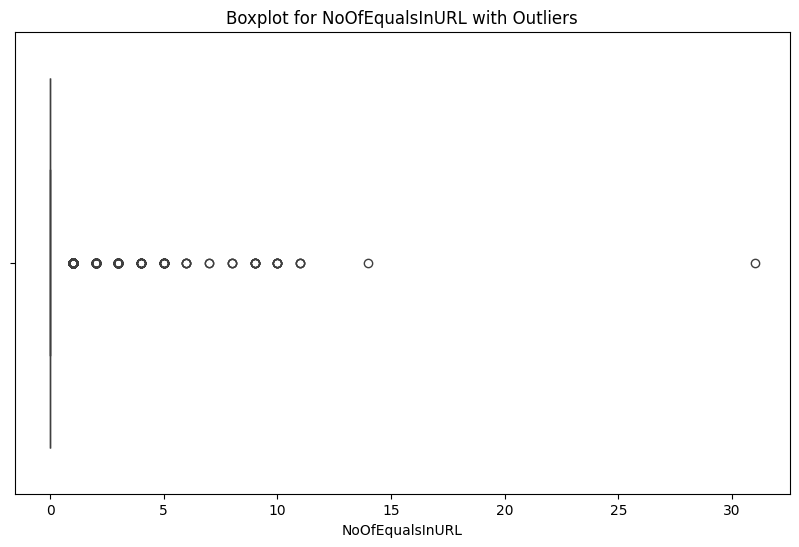

Feature: NoOfQMarkInURL
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
215     1.0
333     1.0
1293    1.0
1621    1.0
2133    1.0
Name: NoOfQMarkInURL, dtype: float64



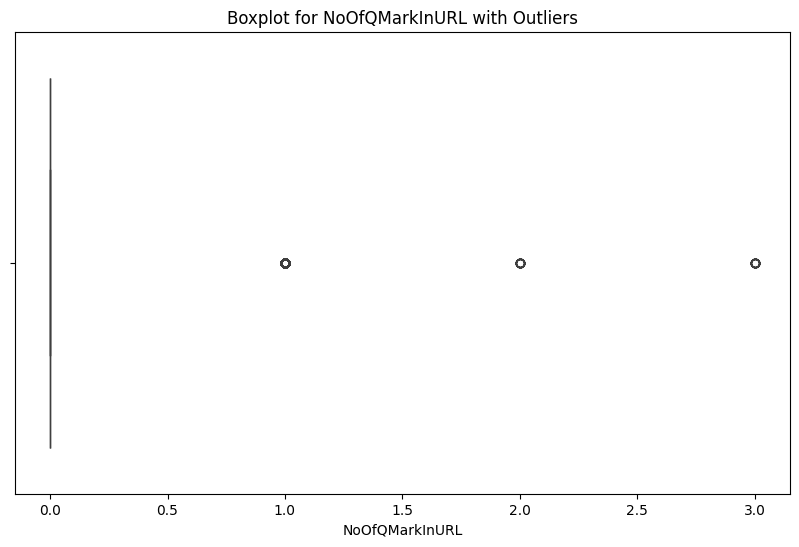

Feature: NoOfAmpersandInURL
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2223     1.0
6764     1.0
8552     2.0
8888     1.0
12301    3.0
Name: NoOfAmpersandInURL, dtype: float64



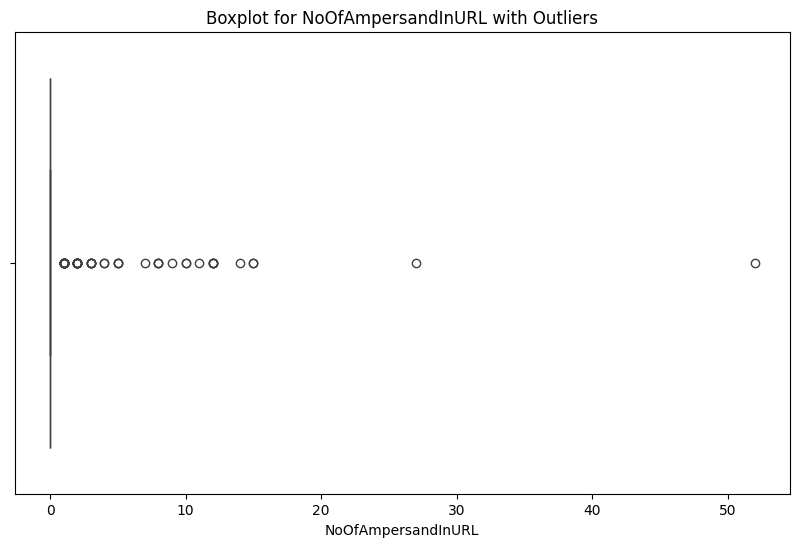

Feature: NoOfOtherSpecialCharsInURL
Q1 (25th percentile): 1.0
Q3 (75th percentile): 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
Outlier terdeteksi:
28     11.0
76      4.0
114     4.0
333    15.0
420     4.0
Name: NoOfOtherSpecialCharsInURL, dtype: float64



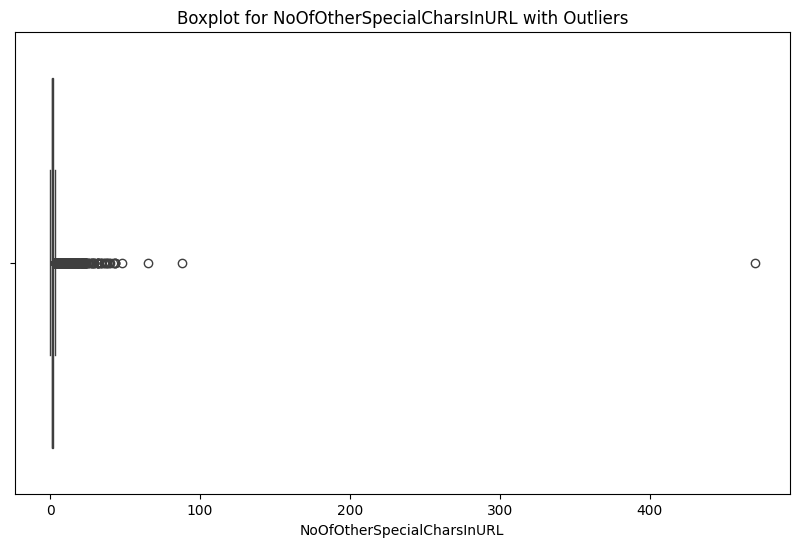

Feature: SpacialCharRatioInURL
Q1 (25th percentile): 0.036
Q3 (75th percentile): 0.057
IQR: 0.021000000000000005
Lower Bound: 0.00449999999999999
Upper Bound: 0.08850000000000001
Outlier terdeteksi:
90     0.091
161    0.120
179    0.091
180    0.115
197    0.095
Name: SpacialCharRatioInURL, dtype: float64



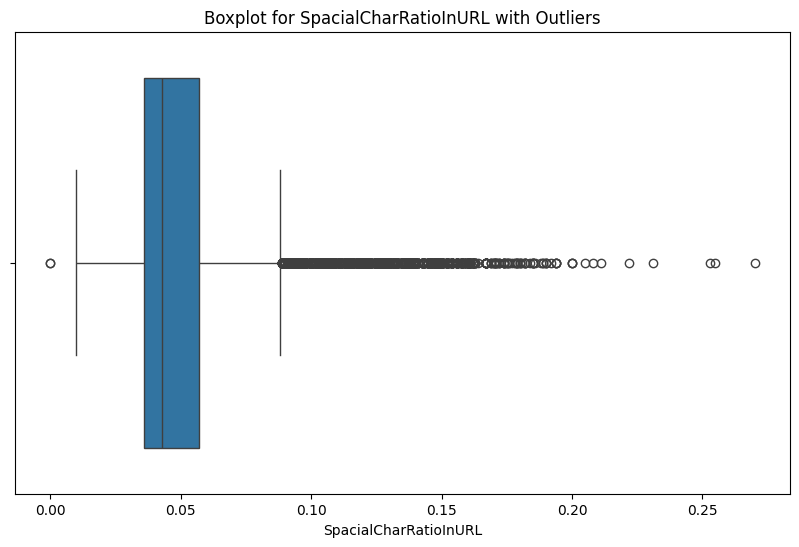

Feature: IsHTTPS
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
65     0.0
205    0.0
240    0.0
254    0.0
282    0.0
Name: IsHTTPS, dtype: float64



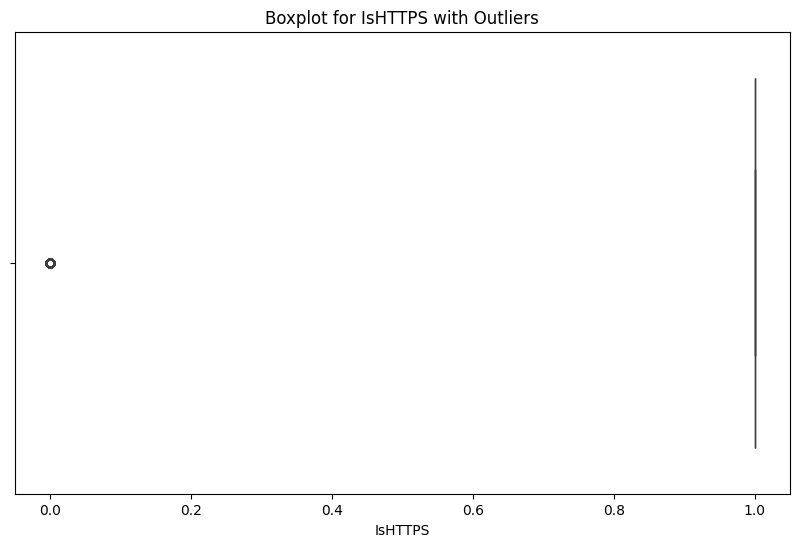

Feature: LineOfCode
Q1 (25th percentile): 516.0
Q3 (75th percentile): 1964.0
IQR: 1448.0
Lower Bound: -1656.0
Upper Bound: 4136.0
Outlier terdeteksi:
19      4286.0
54      4719.0
70      5996.0
99      9790.0
164    39998.0
Name: LineOfCode, dtype: float64



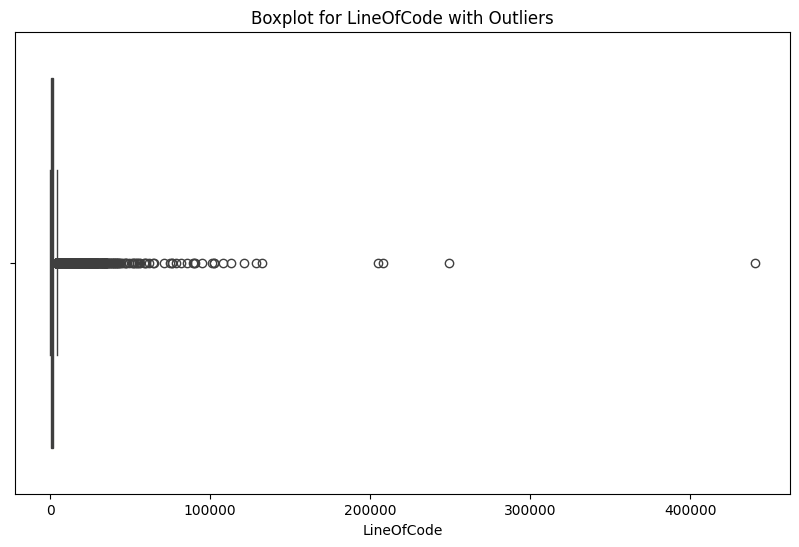

Feature: LargestLineLength
Q1 (25th percentile): 712.0
Q3 (75th percentile): 9381.0
IQR: 8669.0
Lower Bound: -12291.5
Upper Bound: 22384.5
Outlier terdeteksi:
37     26872.0
70     32044.0
131    26870.0
133    47615.0
162    24707.0
Name: LargestLineLength, dtype: float64



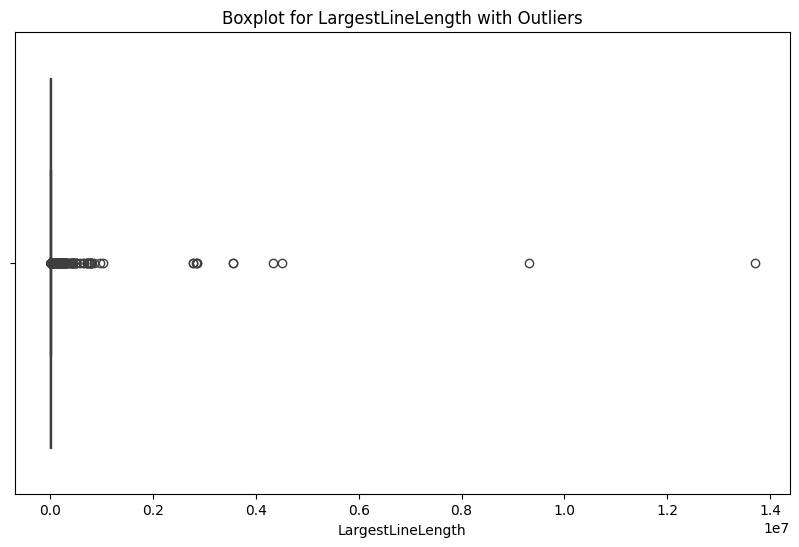

Feature: HasTitle
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
90     0.0
251    0.0
282    0.0
445    0.0
450    0.0
Name: HasTitle, dtype: float64



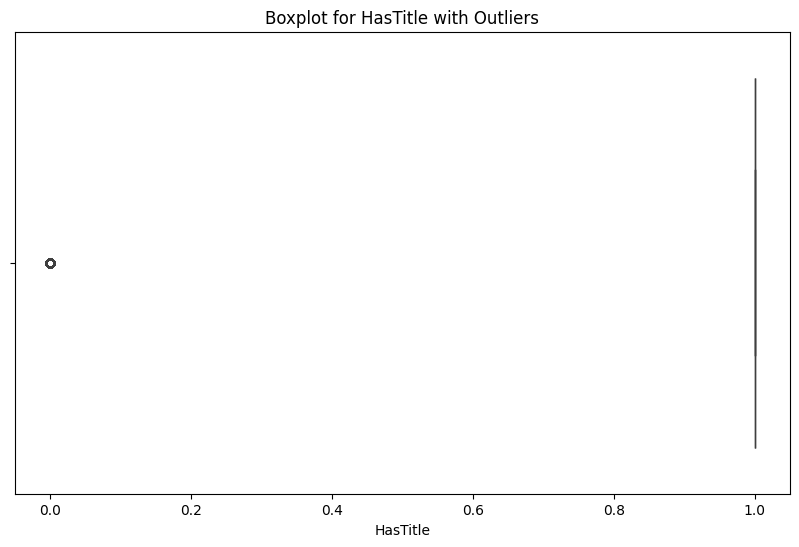

Feature: DomainTitleMatchScore
Q1 (25th percentile): 0.0
Q3 (75th percentile): 100.0
IQR: 100.0
Lower Bound: -150.0
Upper Bound: 250.0
---tidak ada outlier yg terdeteksi---



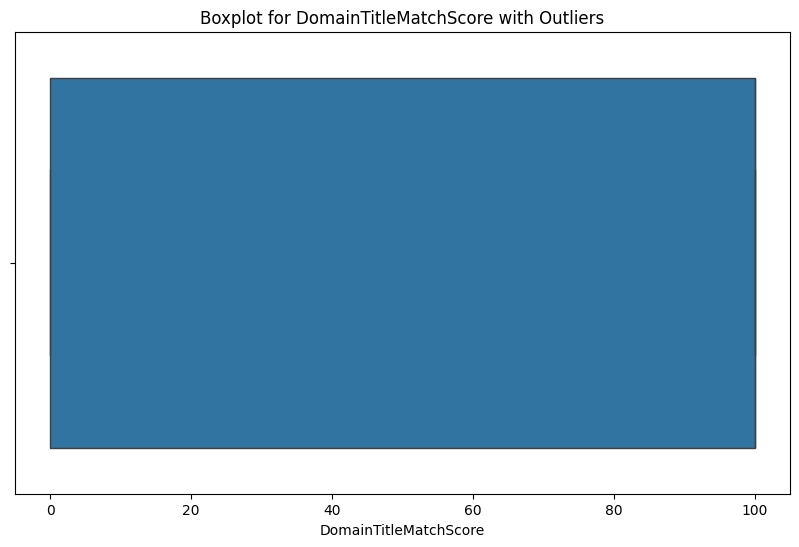

Feature: URLTitleMatchScore
Q1 (25th percentile): 0.0
Q3 (75th percentile): 100.0
IQR: 100.0
Lower Bound: -150.0
Upper Bound: 250.0
---tidak ada outlier yg terdeteksi---



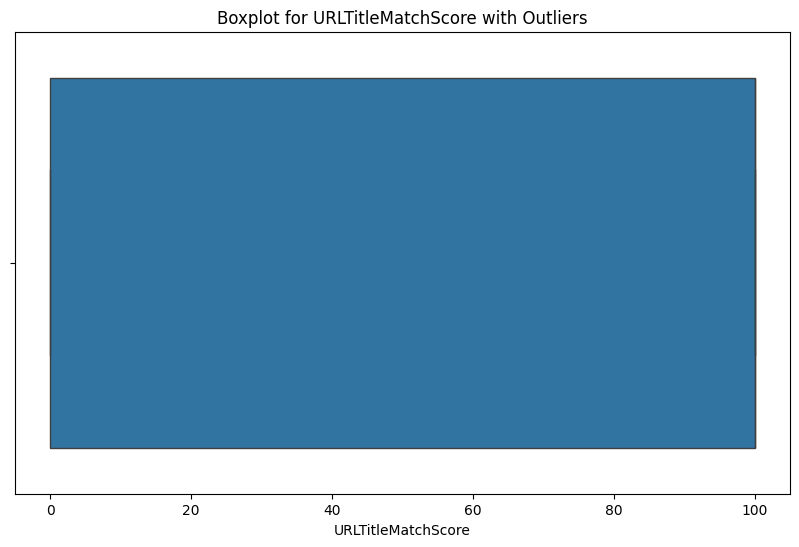

Feature: HasFavicon
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



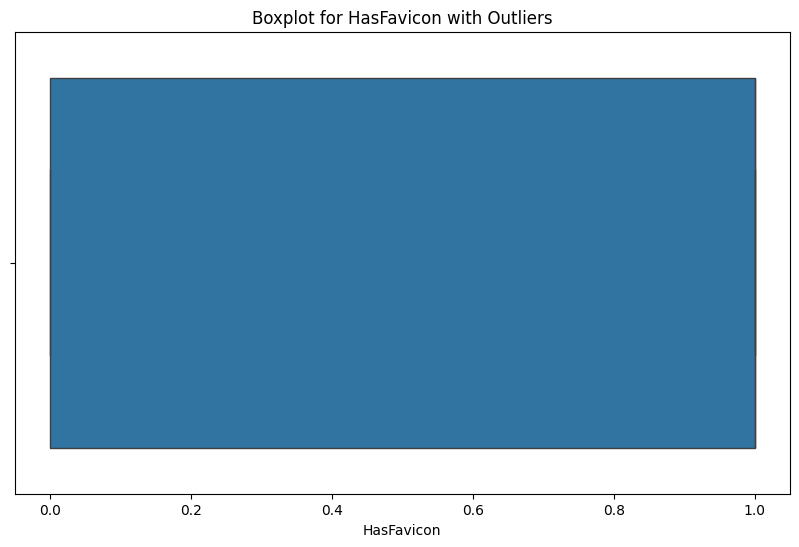

Feature: Robots
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



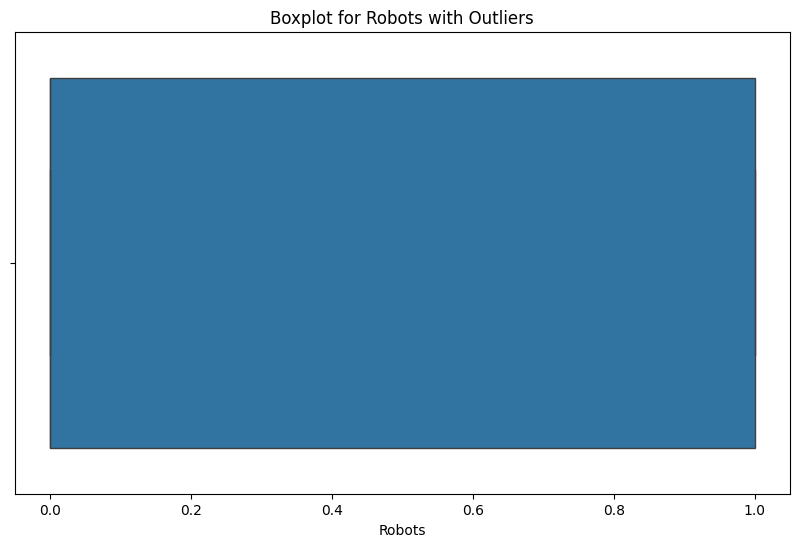

Feature: IsResponsive
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
11    0.0
24    0.0
28    0.0
55    0.0
62    0.0
Name: IsResponsive, dtype: float64



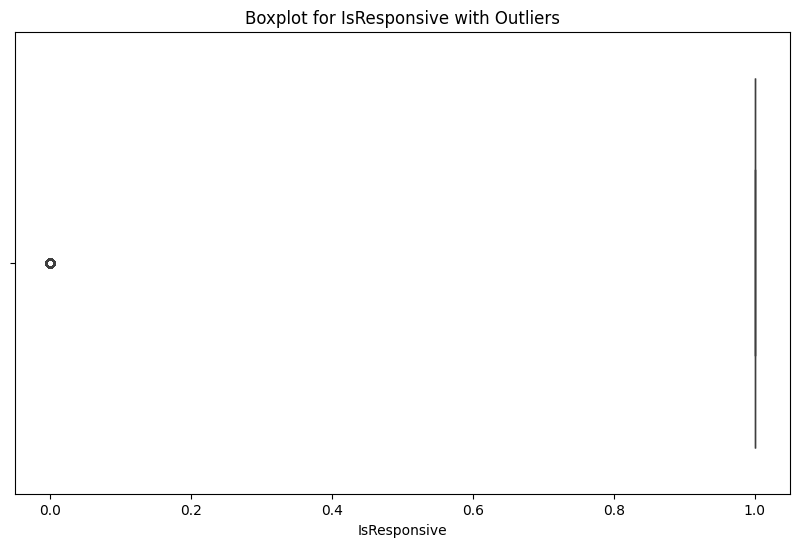

Feature: NoOfURLRedirect
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
14    1.0
22    1.0
29    1.0
33    1.0
40    1.0
Name: NoOfURLRedirect, dtype: float64



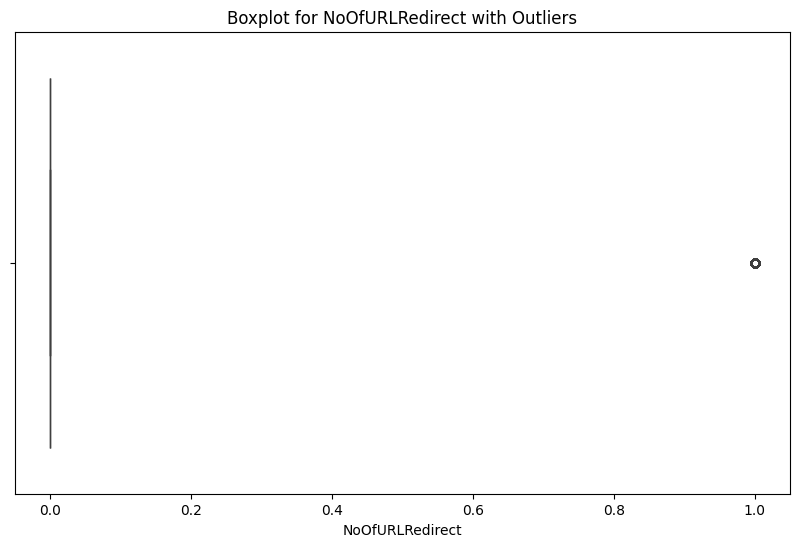

Feature: NoOfSelfRedirect
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2      1.0
47     1.0
65     1.0
106    1.0
190    1.0
Name: NoOfSelfRedirect, dtype: float64



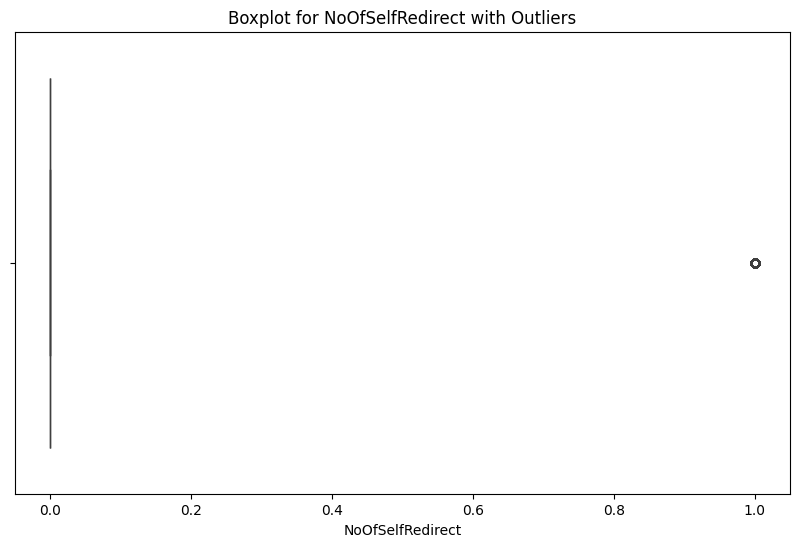

Feature: HasDescription
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



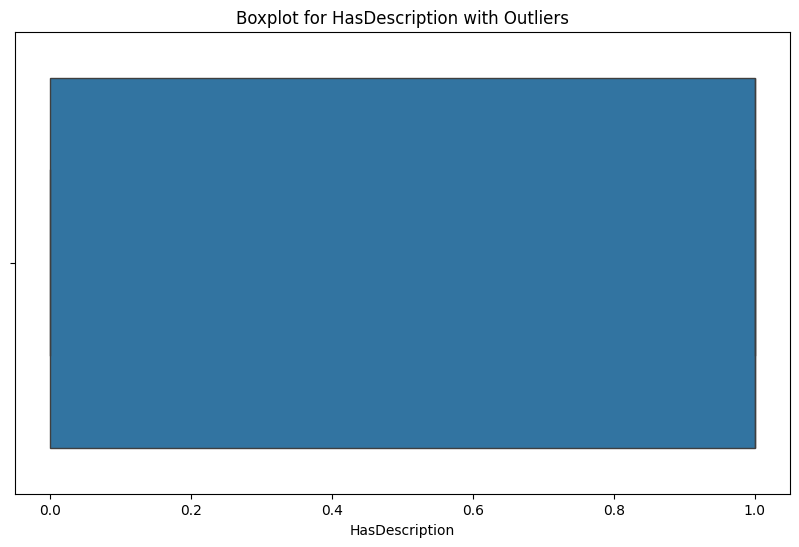

Feature: NoOfPopup
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
3     7.0
9     2.0
21    4.0
47    2.0
62    3.0
Name: NoOfPopup, dtype: float64



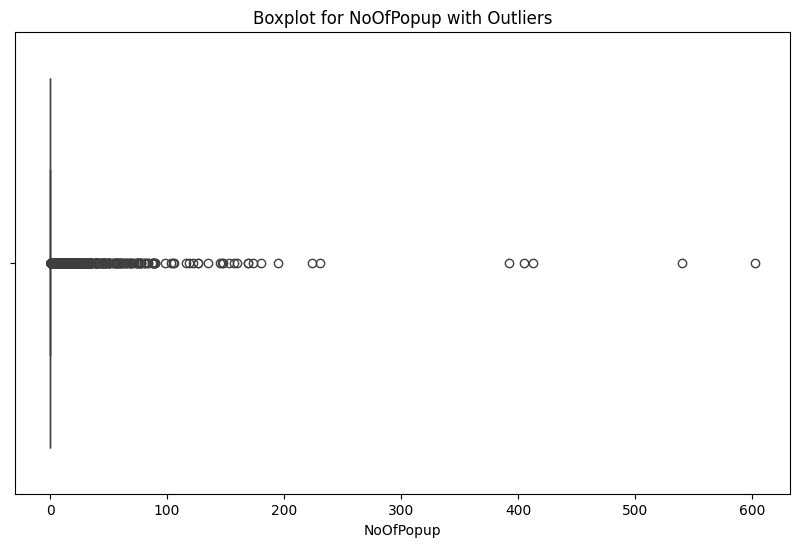

Feature: NoOfiFrame
Q1 (25th percentile): 0.0
Q3 (75th percentile): 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0
Outlier terdeteksi:
10    19.0
35    19.0
54    14.0
70    19.0
74    19.0
Name: NoOfiFrame, dtype: float64



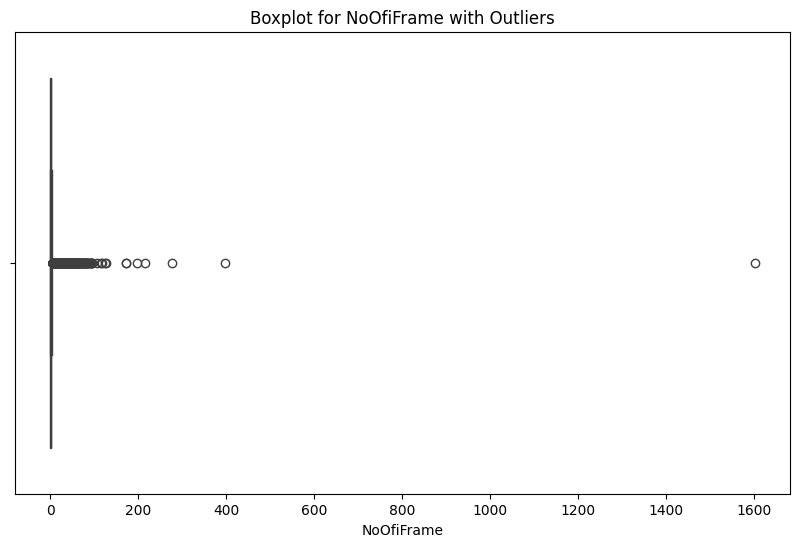

Feature: HasExternalFormSubmit
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
26    1.0
39    1.0
46    1.0
74    1.0
97    1.0
Name: HasExternalFormSubmit, dtype: float64



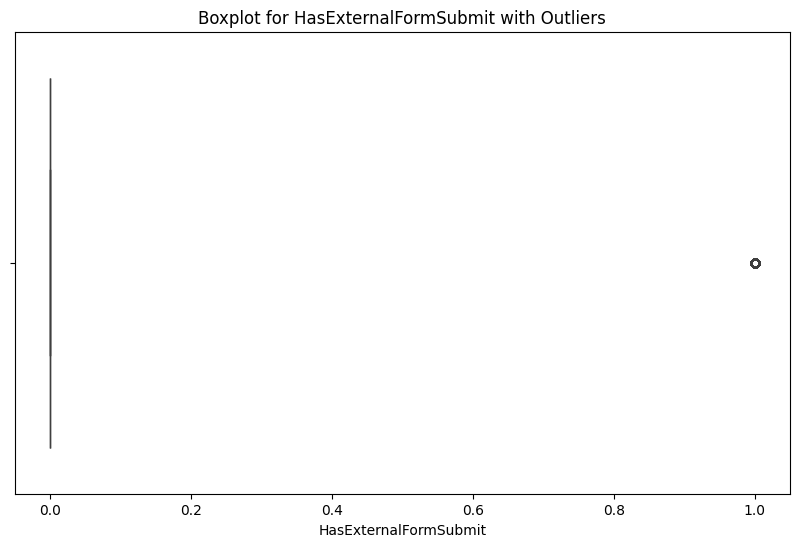

Feature: HasSocialNet
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



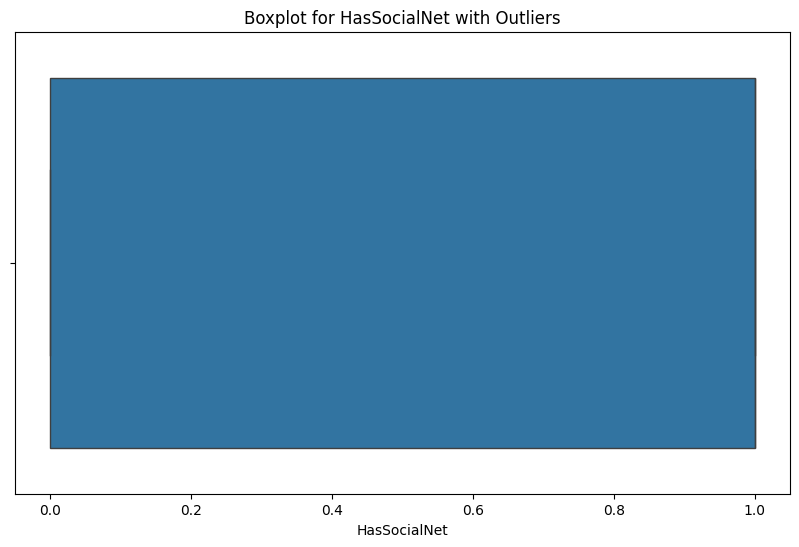

Feature: HasSubmitButton
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



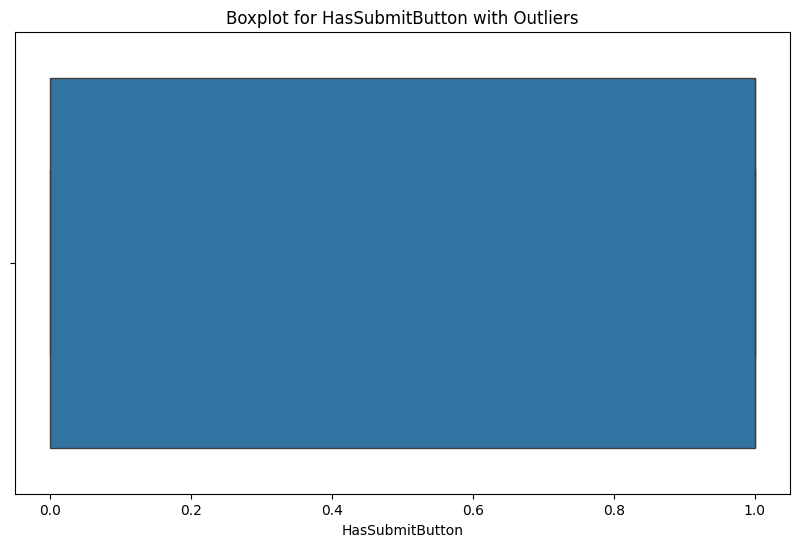

Feature: HasHiddenFields
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



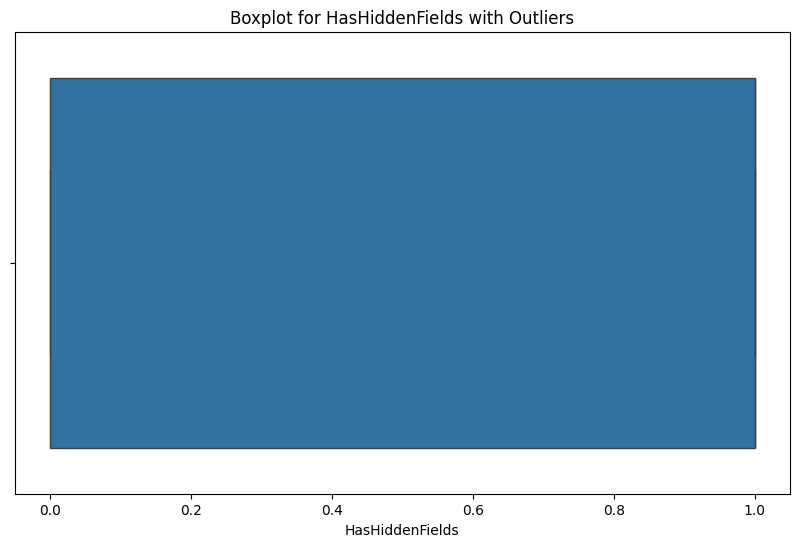

Feature: HasPasswordField
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2     1.0
10    1.0
19    1.0
25    1.0
29    1.0
Name: HasPasswordField, dtype: float64



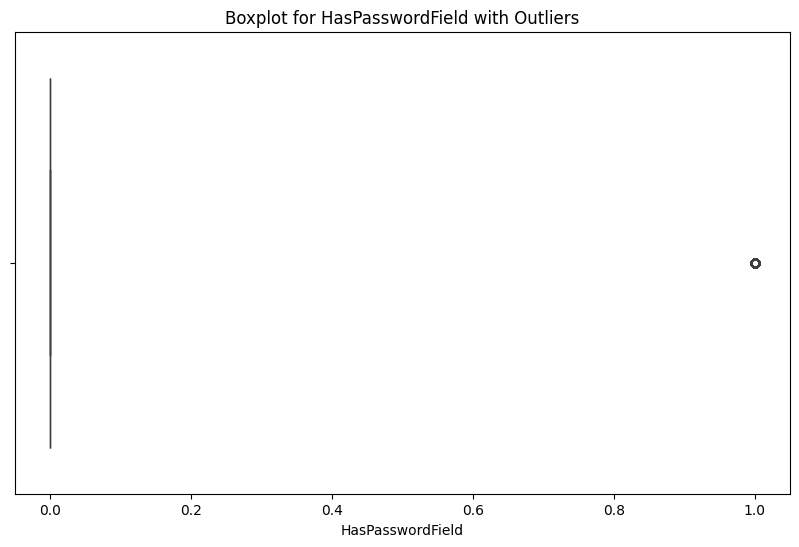

Feature: Bank
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
2     1.0
10    1.0
15    1.0
19    1.0
47    1.0
Name: Bank, dtype: float64



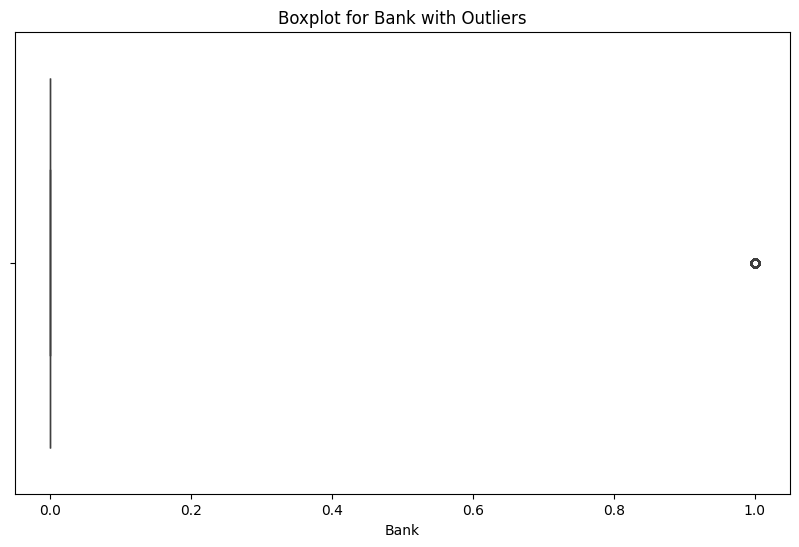

Feature: Pay
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
---tidak ada outlier yg terdeteksi---



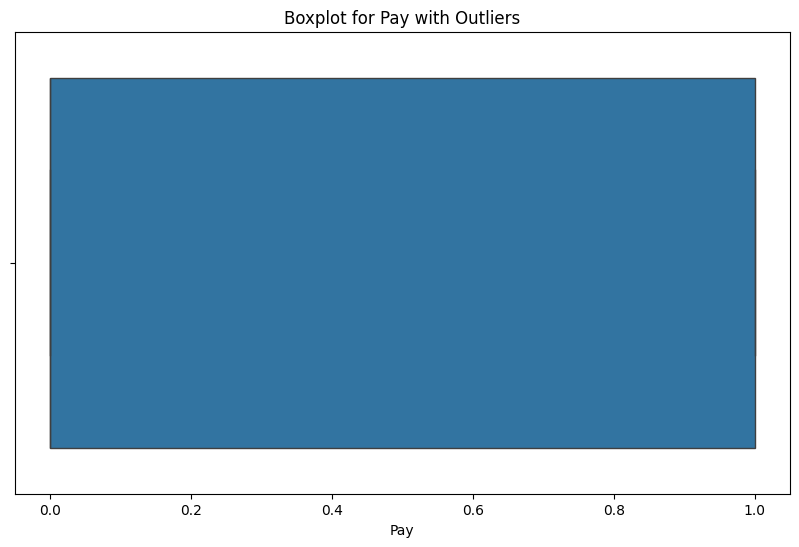

Feature: Crypto
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outlier terdeteksi:
25     1.0
72     1.0
80     1.0
131    1.0
139    1.0
Name: Crypto, dtype: float64



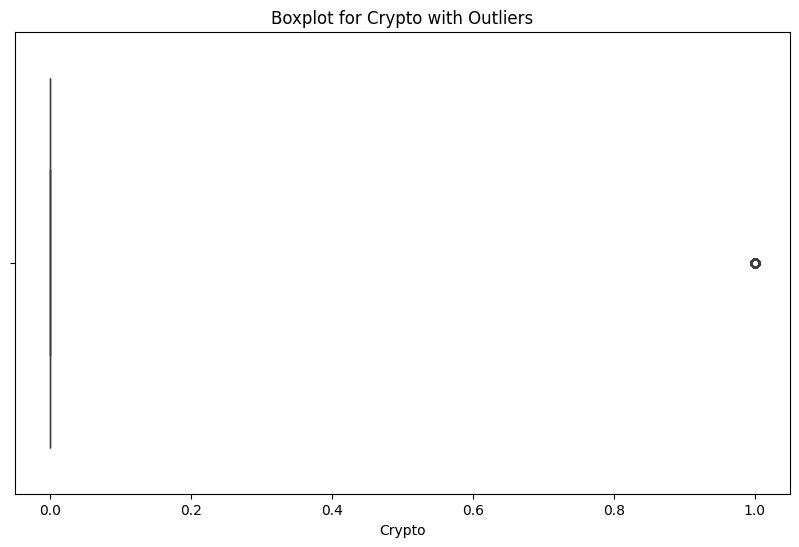

Feature: HasCopyrightInfo
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
1     0.0
5     0.0
8     0.0
12    0.0
22    0.0
Name: HasCopyrightInfo, dtype: float64



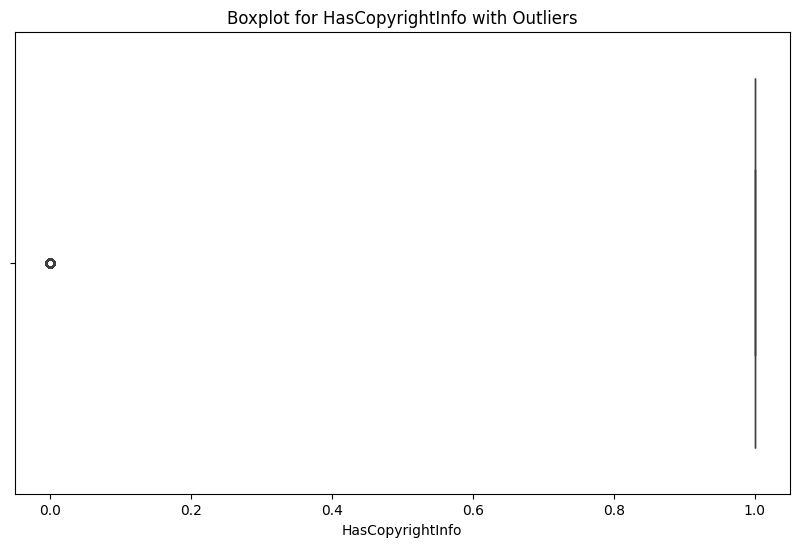

Feature: NoOfImage
Q1 (25th percentile): 10.0
Q3 (75th percentile): 45.0
IQR: 35.0
Lower Bound: -42.5
Upper Bound: 97.5
Outlier terdeteksi:
23     149.0
101    103.0
118    126.0
126    114.0
151    446.0
Name: NoOfImage, dtype: float64



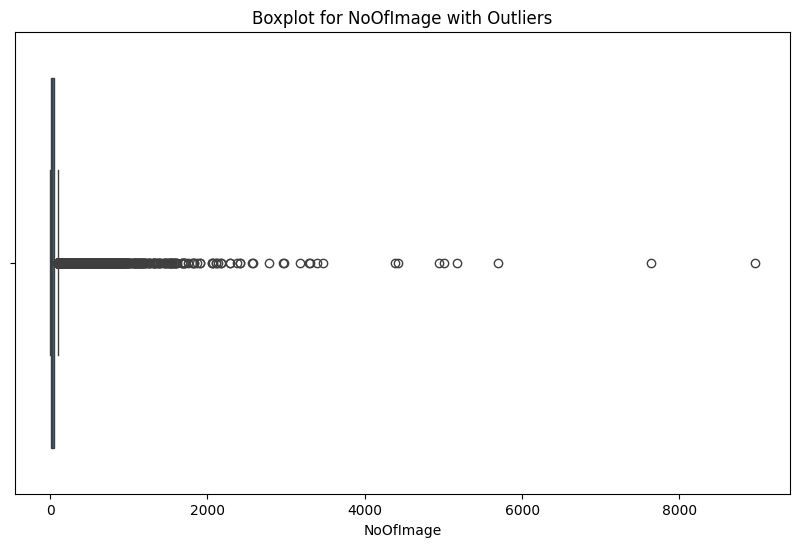

Feature: NoOfCSS
Q1 (25th percentile): 2.0
Q3 (75th percentile): 12.0
IQR: 10.0
Lower Bound: -13.0
Upper Bound: 27.0
Outlier terdeteksi:
8     33.0
15    67.0
37    32.0
47    37.0
49    34.0
Name: NoOfCSS, dtype: float64



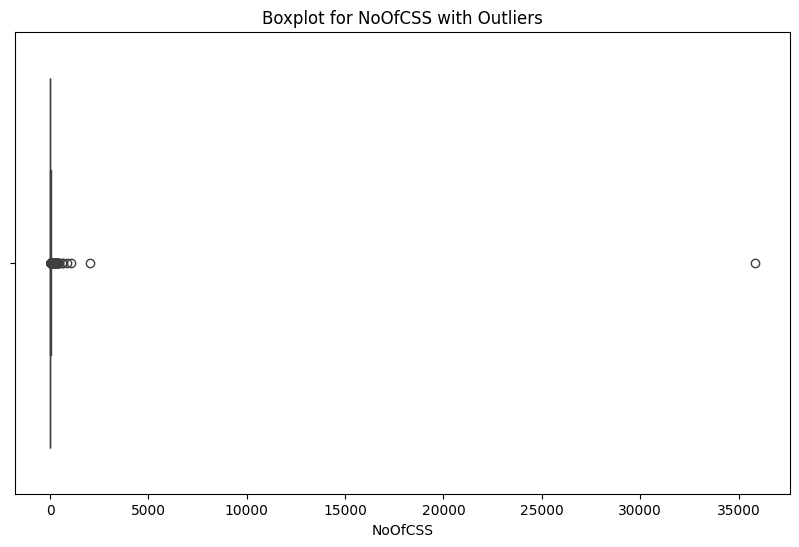

Feature: NoOfJS
Q1 (25th percentile): 6.0
Q3 (75th percentile): 22.0
IQR: 16.0
Lower Bound: -18.0
Upper Bound: 46.0
Outlier terdeteksi:
9      48.0
15     48.0
16     58.0
53     56.0
113    69.0
Name: NoOfJS, dtype: float64



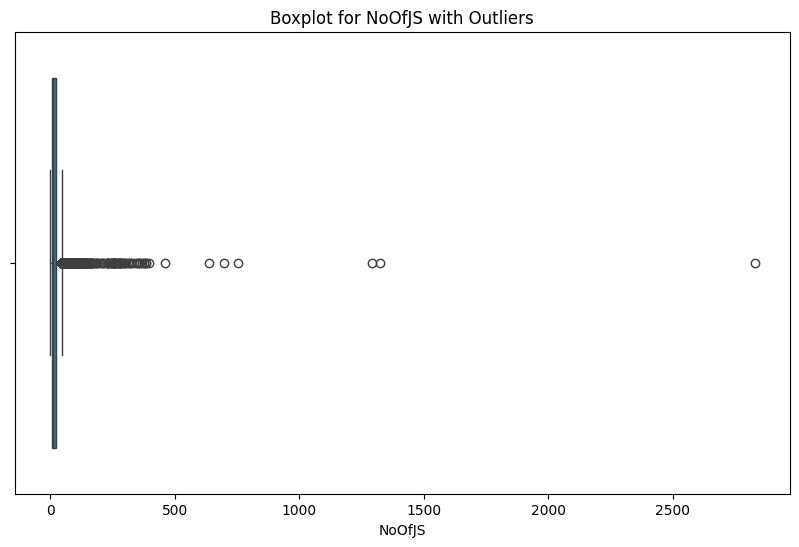

Feature: NoOfSelfRef
Q1 (25th percentile): 24.0
Q3 (75th percentile): 132.0
IQR: 108.0
Lower Bound: -138.0
Upper Bound: 294.0
Outlier terdeteksi:
19      584.0
99      465.0
133     407.0
153    1088.0
168    1817.0
Name: NoOfSelfRef, dtype: float64



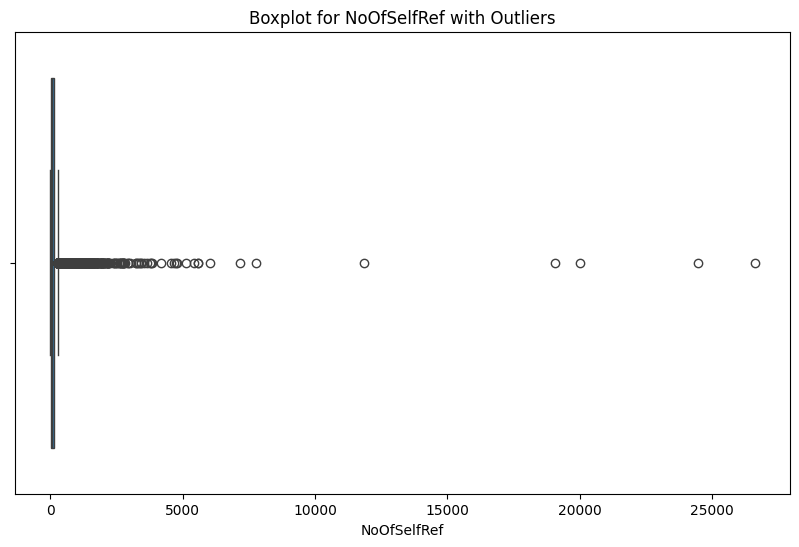

Feature: NoOfEmptyRef
Q1 (25th percentile): 0.0
Q3 (75th percentile): 3.0
IQR: 3.0
Lower Bound: -4.5
Upper Bound: 7.5
Outlier terdeteksi:
9     11.0
16    15.0
37    19.0
40    29.0
62    26.0
Name: NoOfEmptyRef, dtype: float64



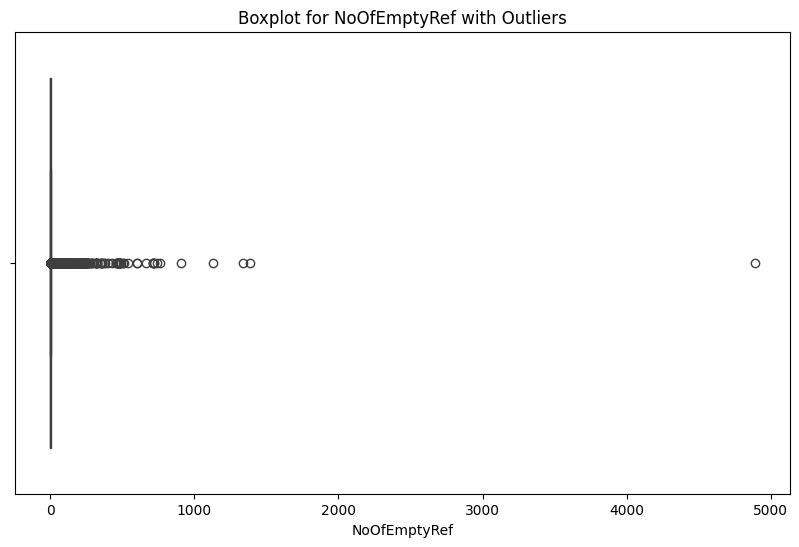

Feature: NoOfExternalRef
Q1 (25th percentile): 13.0
Q3 (75th percentile): 99.0
IQR: 86.0
Lower Bound: -116.0
Upper Bound: 228.0
Outlier terdeteksi:
72     356.0
86     285.0
88     303.0
99     727.0
118    288.0
Name: NoOfExternalRef, dtype: float64



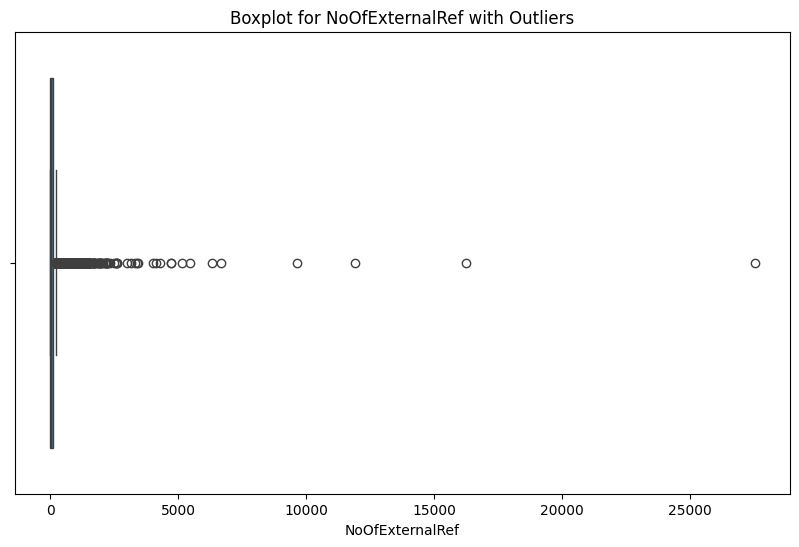

Feature: label
Q1 (25th percentile): 1.0
Q3 (75th percentile): 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier terdeteksi:
1     0
28    0
34    0
65    0
76    0
Name: label, dtype: int64



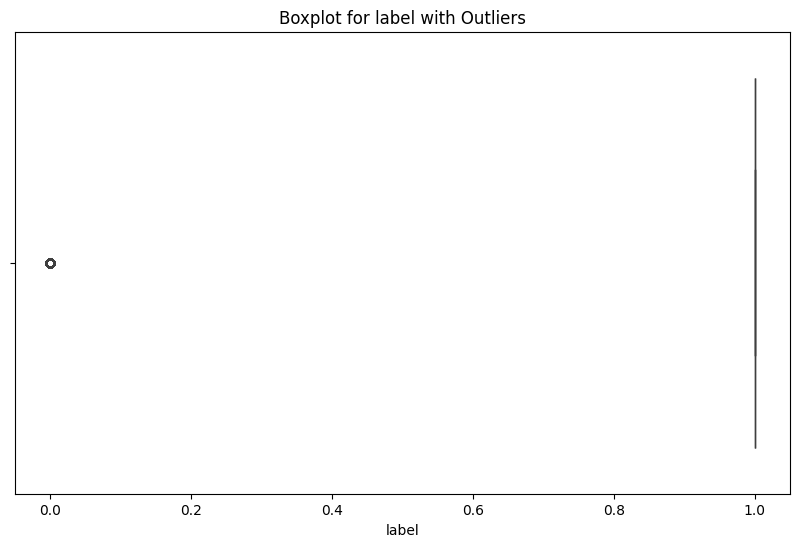

In [ ]:
#2. Outliers for each feature (use the methods you are familiar with).
def detect_outliers_iqr(df):
    outliers = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        print(f"Feature: {column}")
        print(f"Q1 (25th percentile): {Q1}")
        print(f"Q3 (75th percentile): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        
        if outliers[column].empty:
            print("---tidak ada outlier yg terdeteksi---\n")
        else:
            print(f"Outlier terdeteksi:\n{outliers[column][column].head()}\n")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column} with Outliers')
        plt.show()

    return outliers

outliers = detect_outliers_iqr(df)


In [ ]:
#3. Why is it necessary to identify missing values and outliers?
# Identify missing value dan outlier penting karena dapat mempengaruhi keakuratan analisis atau model.
# Missing value bisa menyebabkan data tidak lengkap, 
# Sedangkan outlier bisa mendistorsi hasil analisis dan model, terutama jika data sangat sensitif terhadap nilai ekstrim.
# Dengan mengetahui keduanya, kita dapat melakukan penanganan yang tepat agar hasil analisis data lebih optimal dan tentunya valid.

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [ ]:
# 1. Correlations between features.
correlation_matrix = df.corr()

correlation_matrix


C:\Users\Daffa\AppData\Local\Temp\ipykernel_24736\137343510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
id,1.000000,-0.006493,-0.000968,-0.001687,0.002367,0.001894,-0.004329,0.003860,-0.001072,0.001039,-0.003835,0.000034,-0.003947,-0.002075,-0.000884,-0.003646,0.000922,0.003807,0.006643,-0.000337,-0.001352,0.003433,-0.003722,-0.007535,0.003840,0.003359,0.000974,0.007599,0.000169,-0.002389,0.001190,-0.000111,0.001022,-0.000315,0.002600,-0.004118,-0.001269,0.001492,0.000278,0.000154,-0.004420,-0.004164,0.000819,-0.003632,-0.000708,0.002246,-0.000522,0.005037,0.000219,-0.001404,0.001529
URLLength,-0.006493,1.000000,0.289682,0.204863,-0.124541,0.025708,-0.113507,0.058677,0.035948,0.278809,0.818319,0.200808,0.934413,0.232996,0.848270,0.358640,0.567762,0.451078,0.249567,0.918199,0.088722,-0.045880,-0.050316,0.025849,-0.079910,-0.106907,-0.182476,-0.061099,-0.033456,-0.068979,0.015044,-0.003101,-0.135346,-0.003718,-0.012332,-0.011161,-0.108312,-0.045765,-0.047006,0.006709,-0.008783,-0.015774,-0.014122,-0.071766,-0.031657,-0.038996,-0.032182,-0.066244,-0.008497,-0.029542,-0.222200
DomainLength,-0.000968,0.289682,1.000000,-0.025420,-0.299010,0.123278,-0.009943,0.124980,0.205520,0.021147,0.001108,0.017593,0.481225,0.801304,0.184768,0.185403,0.034522,0.053647,0.021156,0.154869,-0.055450,-0.067099,-0.033143,0.051455,-0.103018,-0.193203,-0.207139,-0.095839,-0.003646,-0.071420,-0.006020,-0.019837,-0.084513,-0.007250,0.000088,0.002061,-0.089895,-0.031670,-0.032446,0.009617,-0.017009,0.005047,-0.023233,-0.093662,-0.044093,-0.024564,-0.034124,-0.055177,-0.011112,-0.024578,-0.229585
IsDomainIP,-0.001687,0.204863,-0.025420,1.000000,-0.069108,-0.022281,-0.077555,-0.005212,0.051158,0.041227,0.067834,0.040336,0.134539,-0.006095,0.300134,0.163114,0.339595,0.423754,-0.000283,0.288181,0.084114,-0.047711,-0.010306,-0.002199,-0.031568,-0.031728,-0.031070,-0.021918,-0.017364,-0.015593,-0.000696,-0.003483,-0.030922,-0.001708,-0.006476,-0.006245,-0.041384,-0.028094,-0.020077,0.000646,-0.010412,-0.014882,-0.004032,-0.036001,-0.009589,-0.012179,-0.016464,-0.010751,-0.004083,-0.007852,-0.077831
CharContinuationRate,0.002367,-0.124541,-0.299010,-0.069108,1.000000,0.286157,0.227600,0.255948,-0.580155,-0.027554,-0.000259,-0.014896,-0.132395,-0.063559,-0.178424,-0.246589,-0.083011,-0.107077,-0.034281,-0.330078,-0.807311,0.148918,0.069688,-0.039257,0.161793,0.515947,0.517723,0.075850,0.084926,0.109179,-0.006460,0.003425,0.164588,0.002402,0.061200,0.033105,0.198676,0.107305,0.091226,0.069102,0.060321,0.098860,0.041899,0.170827,0.043894,-0.006395,0.088193,0.046358,0.012061,0.038281,0.343046
TLDLegitimateProb,0.001894,0.025708,0.123278,-0.022281,0.286157,1.000000,0.274783,0.546112,-0.375222,-0.007741,0.003921,-0.002093,0.059675,0.240391,-0.030231,-0.046766,-0.003954,-0.017316,-0.011201,-0.093364,-0.391997,0.030926,0.030115,0.002076,0.015766,0.431349,0.429219,-0.032892,0.039475,0.022500,0.017676,0.000073,0.100481,0.004252,0.119872,0.026437,0.069404,0.041195,0.049923,0.099364,0.072644,0.099965,0.032874,0.110946,0.037720,0.003678,0.035868,0.007764,0.006910,0.016975,0.059090
URLCharProb,-0.004329,-0.113507,-0.009943,-0.077555,0.227600,0.274783,1.000000,0.188279,-0.111008,-0.027790,-0.016451,-0.018353,-0.081648,0.143974,-0.255870,-0.484968,-0.090086,-0.124659,-0.035034,-0.258282,-0.286765,0.159966,0.049598,-0.035227,0.143180,0.179622,0.163005,0.072280,0.071172,0.108331,0.000589,-0.0

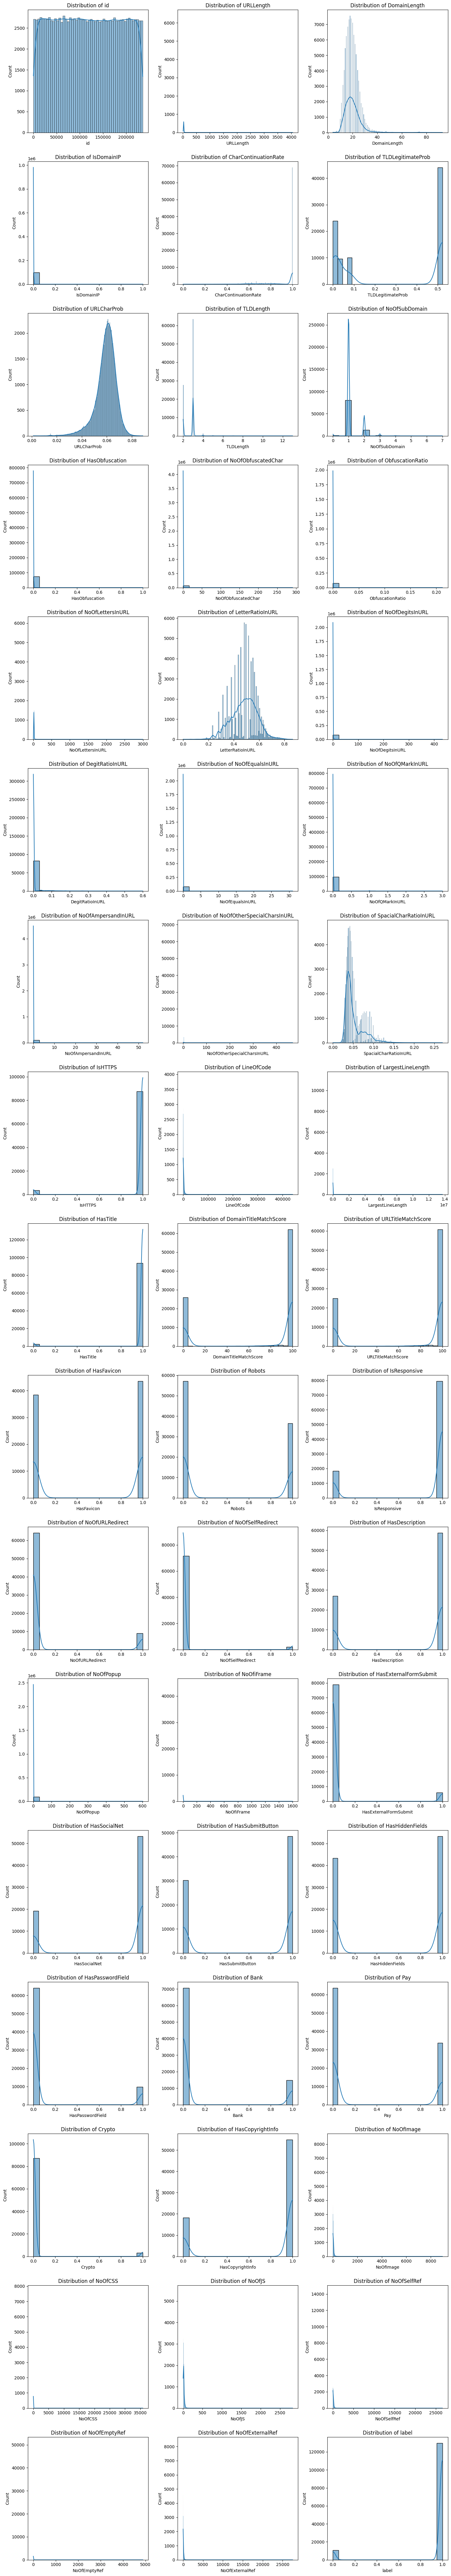

In [ ]:
# 2. Visualize the distribution of each feature (categorical and continuous).
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

n_features = len(numerical_features)
n_rows = (n_features // 3) + (n_features % 3 > 0)  
n_cols = min(3, n_features)

plt.figure(figsize=(15, 5 * n_rows))  
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i+1) 
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

C:\Users\Daffa\AppData\Local\Temp\ipykernel_24736\553498686.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


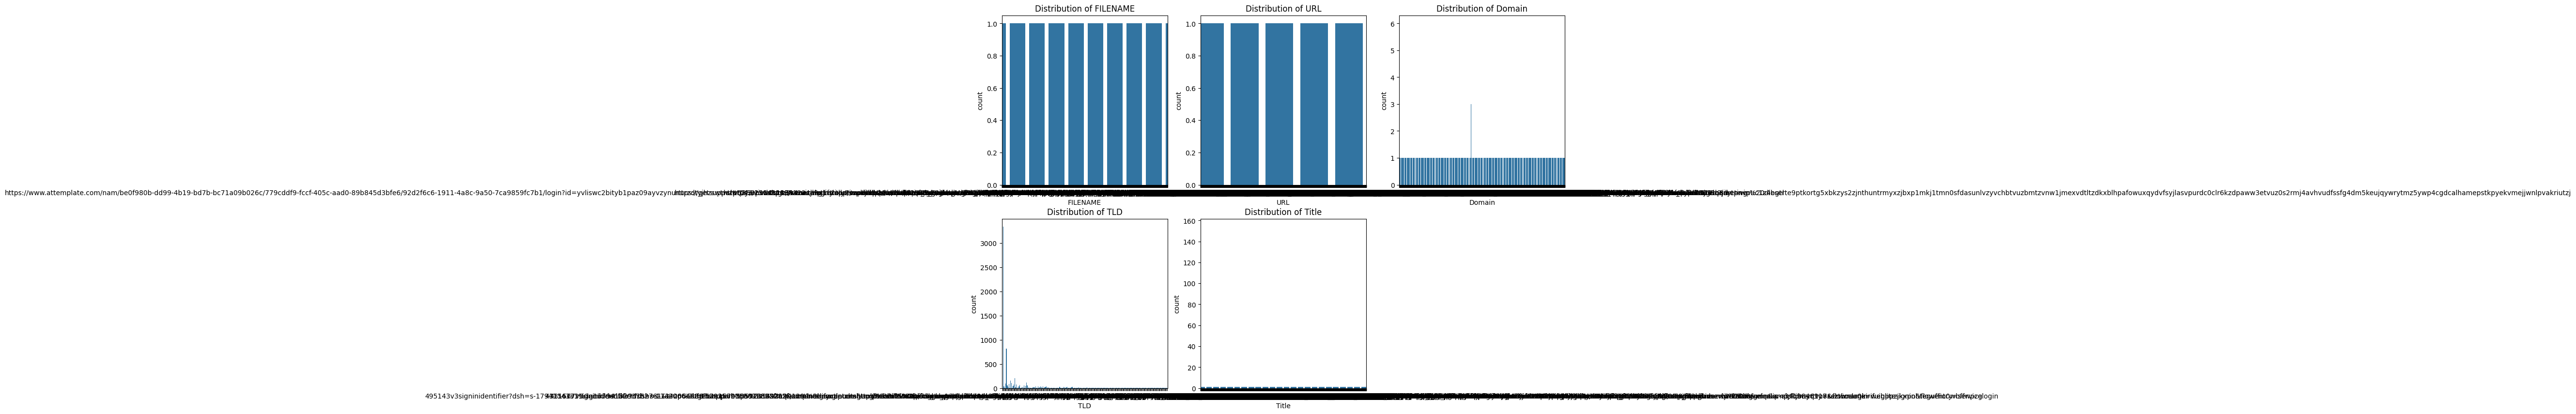

In [ ]:
# Sampling data (mengambil 1000 baris acak untuk mengurangi beban memori)
df_sampled = df.sample(10000, random_state=42)

categorical_features = df_sampled.select_dtypes(include=['object', 'bool']).columns

n_features = len(categorical_features)
n_rows = (n_features // 3) + (n_features % 3 > 0)  # Menghitung jumlah baris
n_cols = min(3, n_features)  # Maksimal 3 kolom

plt.figure(figsize=(15, 5 * n_rows)) 
for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i+1)  
    sns.countplot(x=df_sampled[feature].dropna())
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

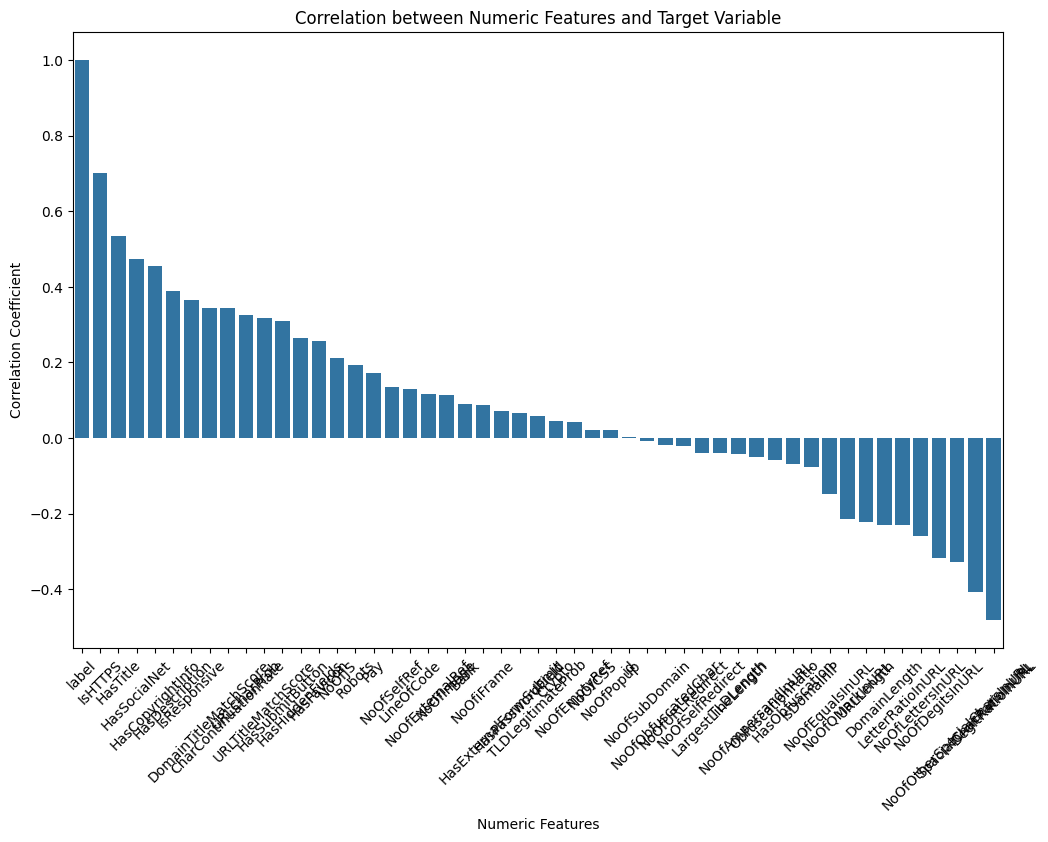

In [ ]:
# 3. Visualize the correlation between features and the target variable.
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_correlations = df[numerical_features].corrwith(df['label']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=numerical_correlations.index, y=numerical_correlations.values)
plt.title('Correlation between Numeric Features and Target Variable')
plt.xticks(rotation=45)
plt.xlabel('Numeric Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [ ]:
# #4. Explain the significance of understanding feature distributions and correlations.

# Memahami distribusi fitur dan korelasi antar fitur berguna untuk menganalisis data dengan lebih baik. Distribusi fitur membantu kita mengetahui apakah data memiliki nilai yang tidak biasa (outlier) atau distribusi yang miring (skewed), sehingga kita bisa melakukan perubahan seperti penyaringan atau penyesuaian skala. Sedangkan, korelasi antar fitur menunjukkan hubungan antara fitur dengan target atau antar fitur, yang membantu kita mengetahui fitur mana yang paling penting untuk prediksi dan mana yang bisa dihapus karena terlalu mirip dengan fitur lain.

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

<Figure size 800x600 with 0 Axes>

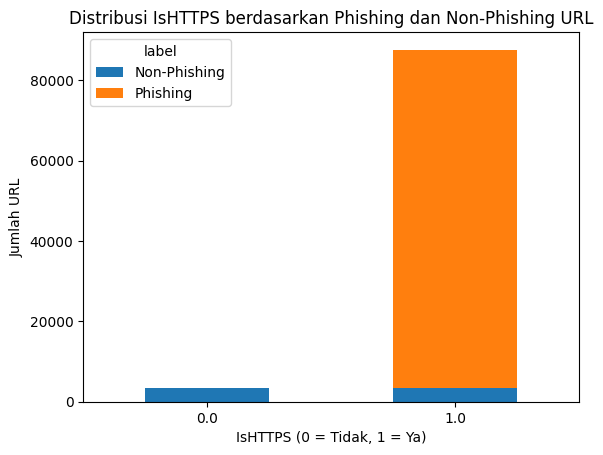

<Figure size 800x600 with 0 Axes>

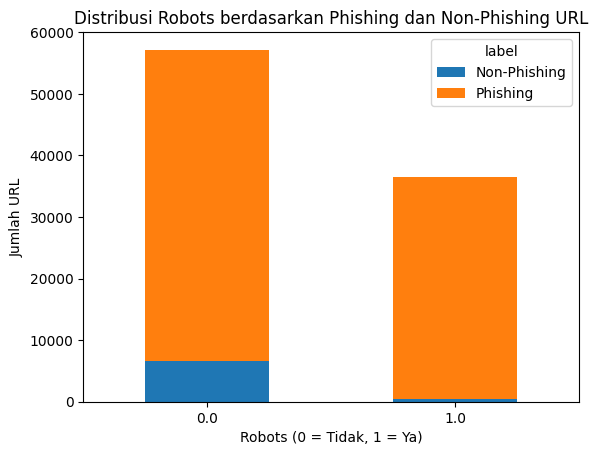

In [ ]:
https_distribution = df.groupby(['IsHTTPS', 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
https_distribution.plot(kind='bar', stacked=True)
plt.title('Distribusi IsHTTPS berdasarkan Phishing dan Non-Phishing URL')
plt.xlabel('IsHTTPS (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah URL')
plt.xticks(rotation=0)
plt.legend(['Non-Phishing', 'Phishing'], title='label')
plt.show()

robots_distribution = df.groupby(['Robots', 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
robots_distribution.plot(kind='bar', stacked=True)
plt.title('Distribusi Robots berdasarkan Phishing dan Non-Phishing URL')
plt.xlabel('Robots (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah URL')
plt.xticks(rotation=0)
plt.legend(['Non-Phishing', 'Phishing'], title='label')
plt.show()

#### Kesimpulan Step 1 no 1

- URL phishing cenderung menggunakan protokol HTTPS untuk meyakinkan pengguna bahwa situs tersebut aman dan terpercaya.
- URL yang melarang akses robot atau bot cenderung memiliki jumlah phising yang lebih banyak daripada Website yang mengizinkan akses robot

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

C:\Users\Daffa\AppData\Local\Temp\ipykernel_24736\3910696254.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = features.corr(method='pearson')


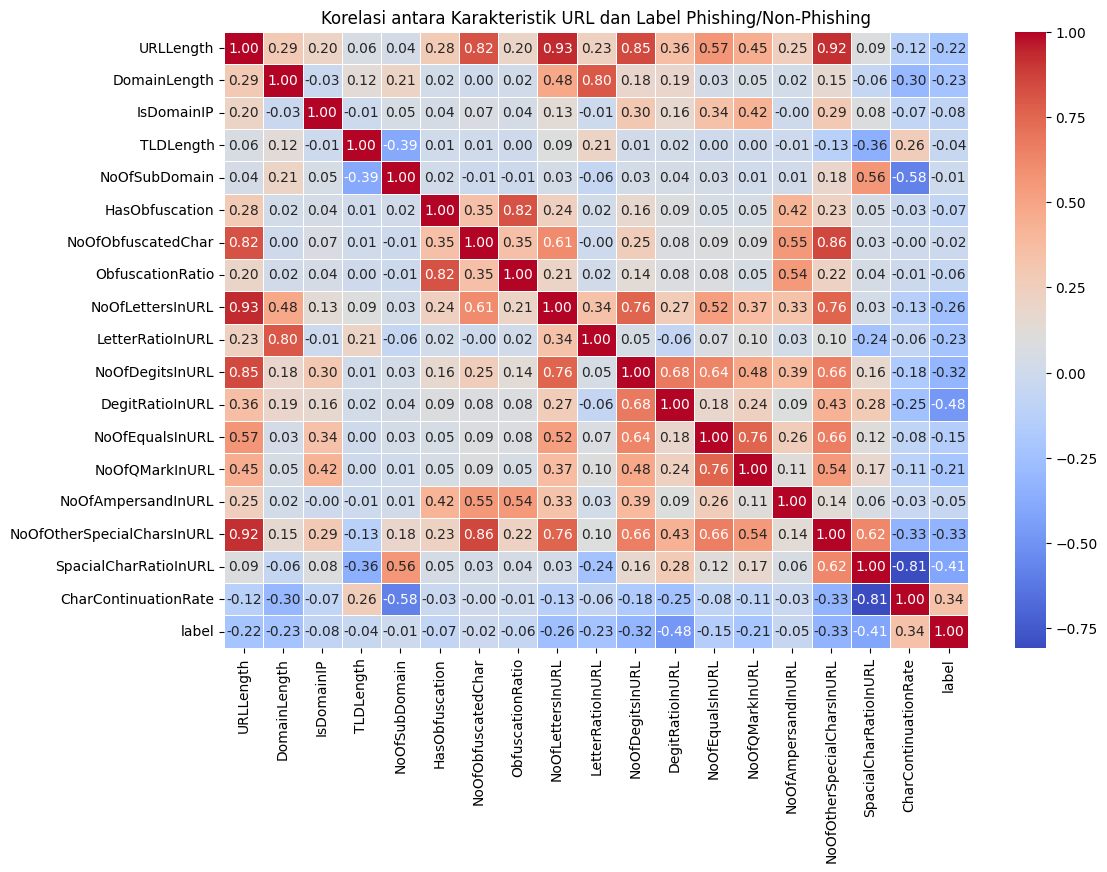

In [ ]:
url_characteristics = [
    'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'TLDLength', 
    'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 
    'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 
    'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 
    'SpacialCharRatioInURL', 'CharContinuationRate'
]

features = df[url_characteristics].copy()
features['label'] = df['label']  

correlation = features.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Karakteristik URL dan Label Phishing/Non-Phishing')
plt.show()

#### Kesimpulan Step 1 No 2

##### Korelasi Positif:
- Jika nilai korelasi mendekati +1 (misalnya, 0.8 hingga 1), berarti ada hubungan yang sangat kuat antara dua variabel. 
- Contohnya, jika URLLength memiliki korelasi positif tinggi dengan Label, maka URL yang lebih panjang cenderung lebih sering ditemukan pada kategori phishing atau non-phishing.

##### Korelasi Negatif:
- Jika nilai korelasi mendekati -1 (misalnya, -0.8 hingga -1), berarti ada hubungan negatif yang kuat. 
- Contohnya, jika HasObfuscation memiliki korelasi negatif tinggi dengan Label, maka URL dengan obfuscation cenderung lebih sering dikategorikan sebagai phishing.

##### Korelasi Nol:
- Jika nilai korelasi mendekati 0, artinya tidak ada hubungan linier yang jelas antara dua variabel. Perubahan pada satu variabel tidak mempengaruhi variabel lainnya.


#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

      NoOfImage                                                        \
          count       mean         std  min   25%   50%   75%     max   
label                                                                   
0        6793.0   0.887237    3.792459  0.0   0.0   0.0   0.0   158.0   
1       83139.0  44.977868  105.949319  0.0  13.0  25.0  47.0  8956.0   

       NoOfCSS                                                        NoOfJS  \
         count       mean         std  min  25%  50%   75%      max    count   
label                                                                          
0       5465.0   0.393230    1.073604  0.0  0.0  0.0   0.0     15.0   6032.0   
1      67805.0  11.064568  138.559429  0.0  3.0  6.0  13.0  35820.0  73571.0   

                                                          NoOfSelfRef  \
            mean        std  min  25%   50%   75%     max       count   
label                                                                   
0       0.8784

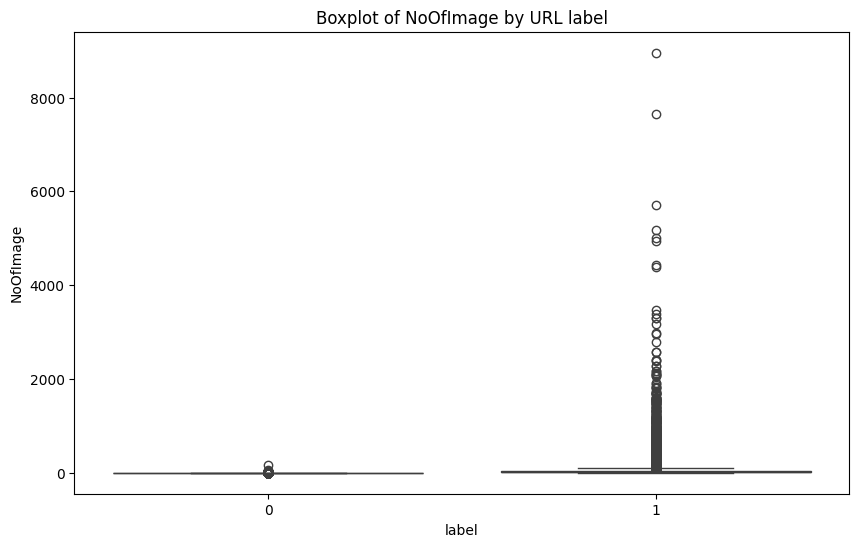

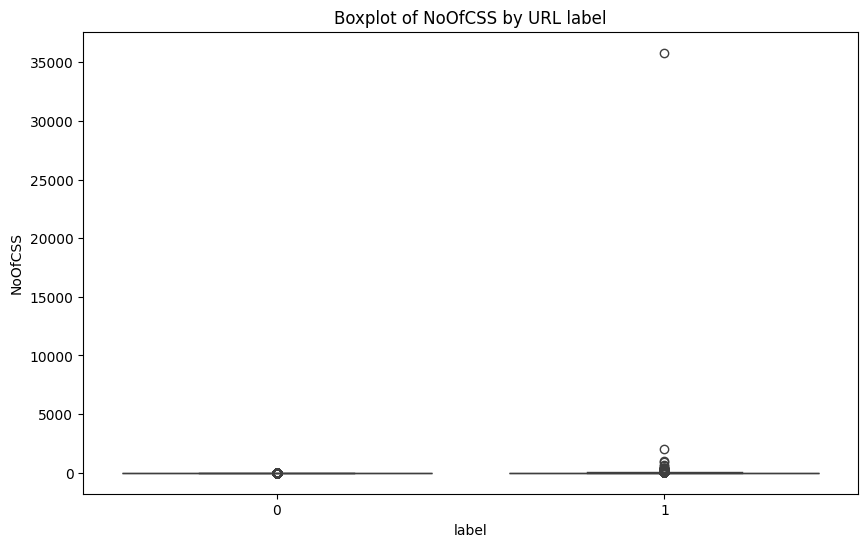

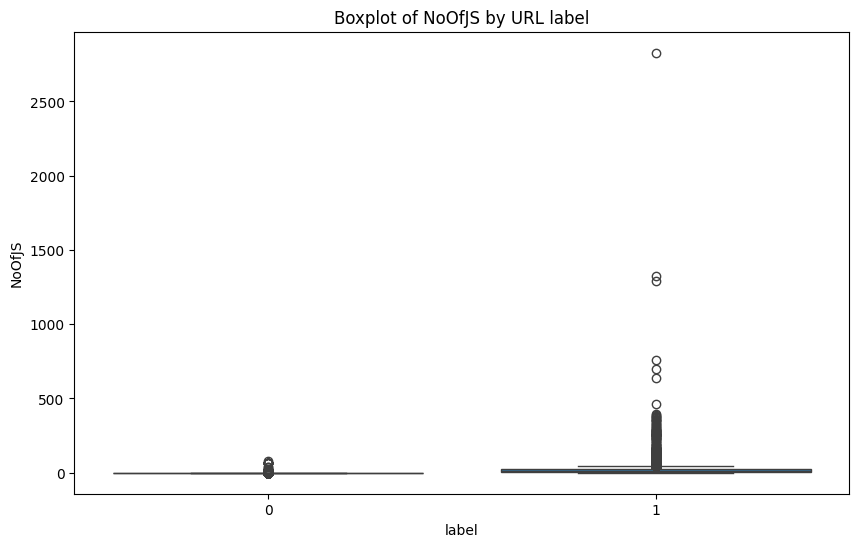

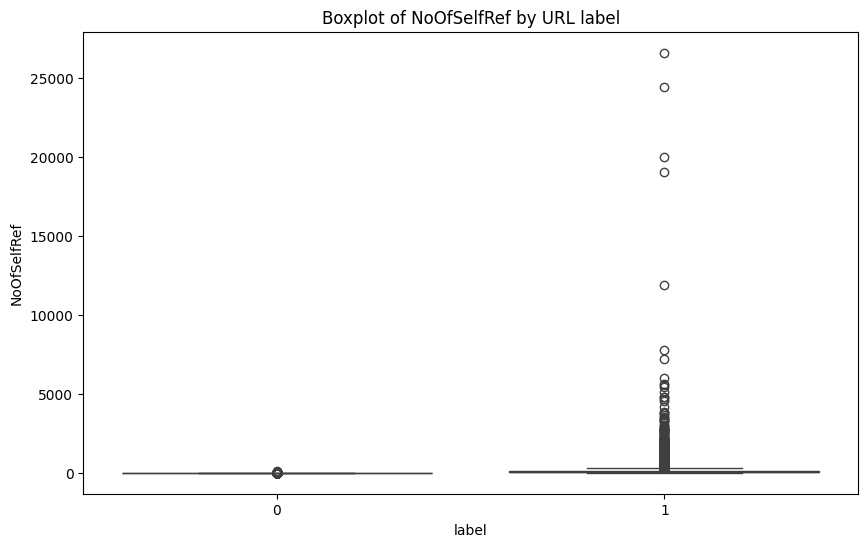

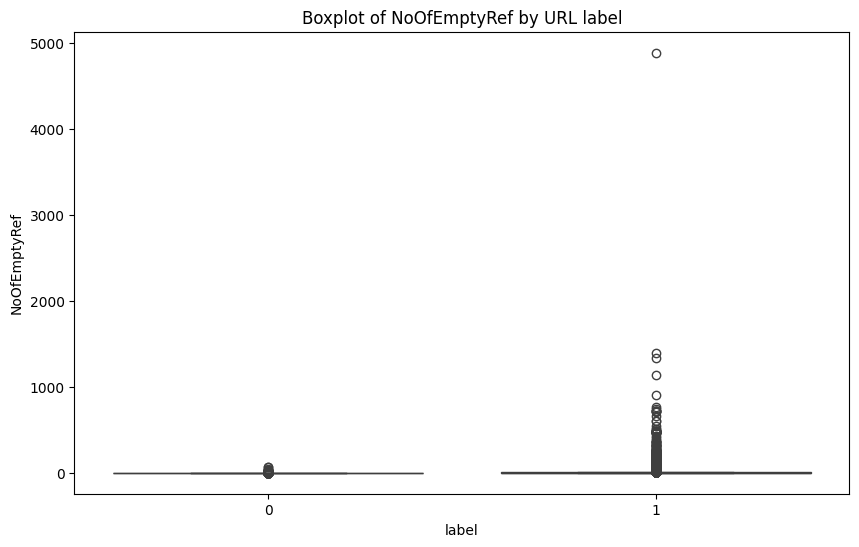

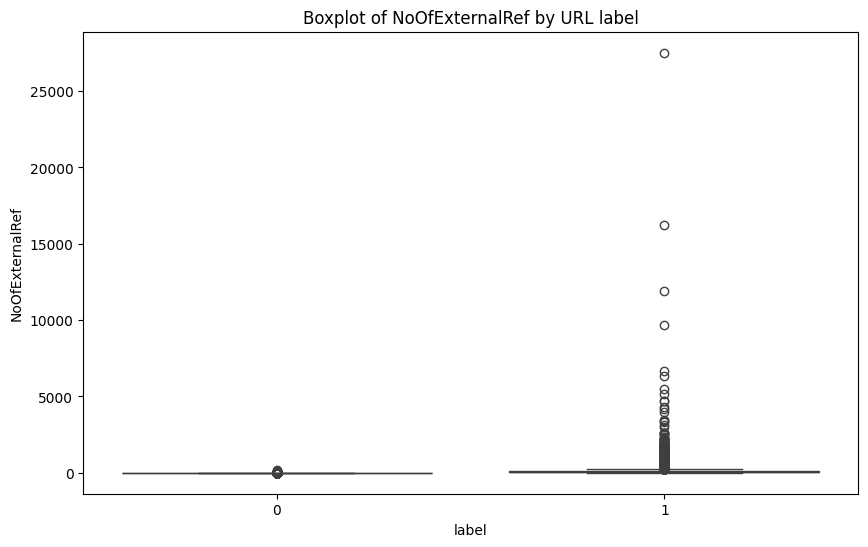

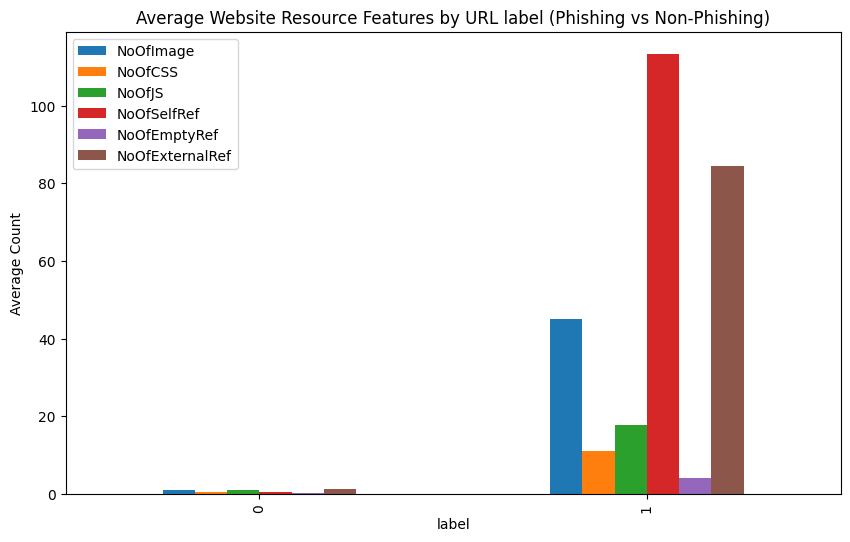

In [ ]:
from scipy.stats import mannwhitneyu

website_features = ['NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

print(df[website_features + ['label']].groupby('label').describe())

for feature in website_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by URL label')
    plt.show()

df.groupby('label')[website_features].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Website Resource Features by URL label (Phishing vs Non-Phishing)')
plt.ylabel('Average Count')
plt.show()



#### Kesimpulan Step 1 No 3 
Website phishing cenderung memiliki sumber daya yang lebih banyak (gambar, CSS, JS, dll.) dibandingkan dengan website non-phishing. Perbedaan ini mencerminkan tindakan phishing untuk meniru website yang sah dengan tampilan dan struktur yang lebih kompleks. website Phishing juga sering menggunakan sumber daya eksternal dan referensi kosong (tercermin pada nilai noOfEmptyRef dan noOfExternal bernilai tinggi).

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. Bagaimana pengaruh jumlah subdomain (NoOfSubDomain) terhadap klasifikasi URL sebagai phishing atau non-phishing?

C:\Users\Daffa\AppData\Local\Temp\ipykernel_24736\3910681424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='NoOfObfuscatedChar', palette='Set2')


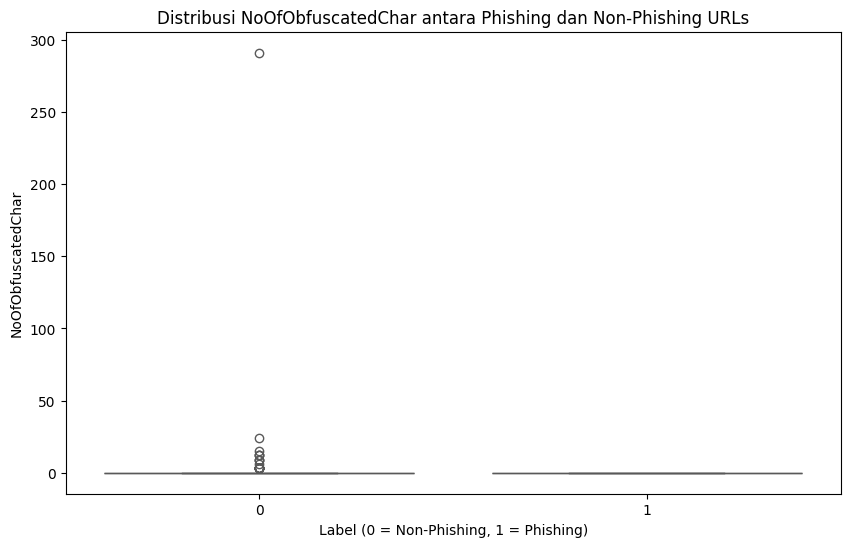

U-statistic: nan, p-value: nan


In [ ]:
from scipy.stats import mannwhitneyu

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='NoOfObfuscatedChar', palette='Set2')
plt.title('Distribusi NoOfObfuscatedChar antara Phishing dan Non-Phishing URLs')
plt.xlabel('Label (0 = Non-Phishing, 1 = Phishing)')
plt.ylabel('NoOfObfuscatedChar')
plt.show()

phishing_urls = df[df['label'] == 1]['NoOfSubDomain']
non_phishing_urls = df[df['label'] == 0]['NoOfSubDomain']

u_statistic, p_value = mannwhitneyu(phishing_urls, non_phishing_urls)
print(f'U-statistic: {u_statistic}, p-value: {p_value}')



#### 5. Apakah situs yang memiliki fitur pembayaran (Pay = 1) lebih sering memiliki informasi hak cipta (HasCopyrightInfo)?

C:\Users\asus\AppData\Local\Temp\ipykernel_6732\477543040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_copyright_info.index, y=pay_copyright_info.values, palette="viridis")


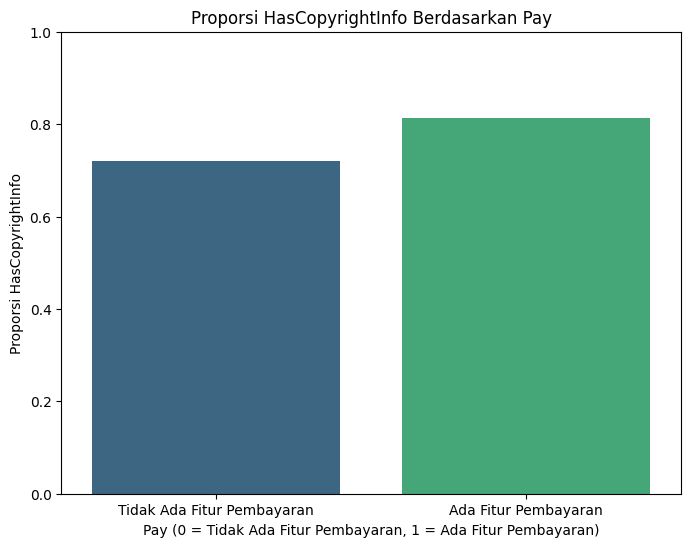

Pay
0.0    0.719795
1.0    0.813806
Name: HasCopyrightInfo, dtype: float64


In [8]:
pay_copyright_info = df.groupby('Pay')['HasCopyrightInfo'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=pay_copyright_info.index, y=pay_copyright_info.values, palette="viridis")
plt.title('Proporsi HasCopyrightInfo Berdasarkan Pay')
plt.xlabel('Pay (0 = Tidak Ada Fitur Pembayaran, 1 = Ada Fitur Pembayaran)')
plt.ylabel('Proporsi HasCopyrightInfo')
plt.xticks([0, 1], ['Tidak Ada Fitur Pembayaran', 'Ada Fitur Pembayaran'])
plt.ylim(0, 1)
plt.show()

print(pay_copyright_info)


#### Kesimpulan
Situs yang memiliki fitur pembayaran cenderung lebih sering mencantumkan informasi hak cipta dibandingkan situs tanpa fitur pembayaran. 
Hal ini terjadi karena situs dengan fitur pembayaran harus lebih memperhatikan aspek legalitas dan perlindungan hak cipta dan juga karena mereka melibatkan transaksi sehingga membangun kepercayaan pengguna. ​

#### 6. Apakah situs yang menggunakan pembayaran (Pay = 1) memiliki karakteristik jumlah gambar (NoOfImage) yang berbeda dibandingkan situs lain?

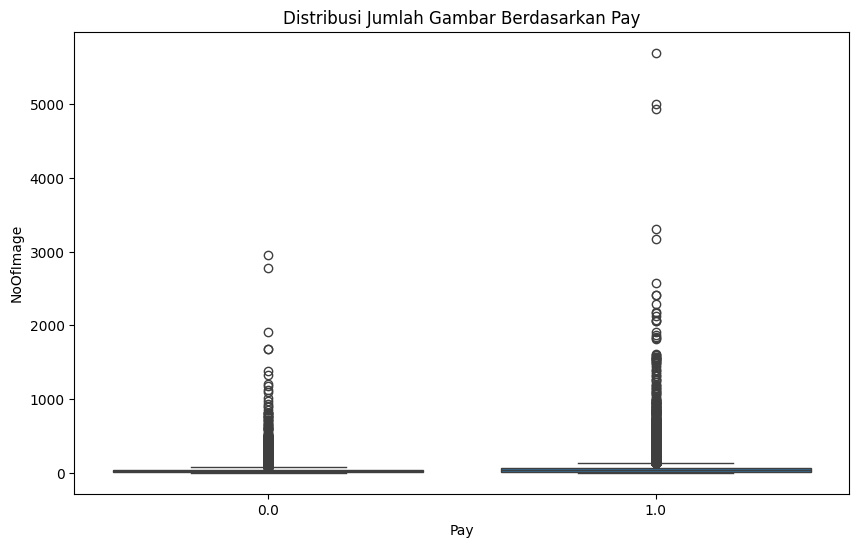

       count       mean         std  min   25%   50%   75%     max
Pay                                                               
0.0  40687.0  31.617716   53.794368  0.0   8.0  20.0  38.0  2959.0
1.0  21657.0  59.167105  132.923830  0.0  16.0  31.0  60.0  5699.0


In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pay', y='NoOfImage', data=df)
plt.title('Distribusi Jumlah Gambar Berdasarkan Pay')
plt.xlabel('Pay')
plt.ylabel('NoOfImage')
plt.show()

pay_image_stats = df.groupby('Pay')['NoOfImage'].describe()
print(pay_image_stats)



#### Kesimpulan Step 2 No 3
terlihat bahwa situs yang memiliki fitur pembayaran (Pay = 1) cenderung memiliki jumlah gambar (NoOfImage) yang lebih tinggi dibandingkan situs tanpa fitur pembayaran (Pay = 0). Rata-rata jumlah gambar pada situs dengan fitur pembayaran adalah 59,17, sedangkan pada situs tanpa fitur pembayaran adalah 31,62. Selain itu, variasi jumlah gambar pada situs dengan fitur pembayaran lebih besar, ditunjukkan oleh standar deviasi yang lebih tinggi (132,92) dibandingkan situs tanpa fitur pembayaran (53,79). Hal ini menunjukkan bahwa situs dengan fitur pembayaran cenderung memiliki desain visual yang lebih kompleks dan beragam.